# ResNet Model Building Pipeline for 1D Signals with DEMO
#### ResNet18, ResNet34, ResNet50, ResNet101, ResNet152

In [5]:
import socket
import tornado.iostream

# Create a TCP connection to a server running on localhost at port 8000
sock = socket.create_connection(('localhost', 8888))

# Create an IOStream object with a large buffer size
stream = tornado.iostream.IOStream(sock, max_buffer_size=1073741824)


In [6]:
import numpy as np
import pandas as pd
# import seaborn as sns
from numpy import interp
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate, BatchNormalization, Activation, add
from keras.layers import Conv2D, MaxPooling2D, Reshape, Flatten, Dense
from keras.models import Model, model_from_json
from keras.optimizers import Adam, RMSprop
# from tensorflow.keras.optimizers import AdamW
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import Normalizer,MinMaxScaler,StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
# sns.set_theme(style="whitegrid")
import pywt
np.set_printoptions(suppress=True)
# Import ResNet1D Module
from ResNet_1DCNN import ResNet

In [7]:
columns = ['Fx','Fy','Fz','Mx','My','Mz']
# columns = ['Fx']
wavelet = 'db4'
max_iter = 50
iter = 0

# Walking Dataset
InsoleWalking1 = pd.read_csv('0310AyuRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking2 = pd.read_csv('0310HudaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking3 = pd.read_csv('0311LalaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking4 = pd.read_csv('0311YunitaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking5 = pd.read_csv('0312AbelRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking6 = pd.read_csv('0312AbiRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking7 = pd.read_csv('0312AryaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking8 = pd.read_csv('0312HawaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking9 = pd.read_csv('0312NisaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking10 = pd.read_csv('0313ChenChengRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking11 = pd.read_csv('0313RezaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking12 = pd.read_csv('0313RilaniRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking13 = pd.read_csv('0313SariRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking14 = pd.read_csv('0313ShelbyRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking15 = pd.read_csv('0314HelenRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking16 = pd.read_csv('0315AyuRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking17 = pd.read_csv('0315HappyRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking18 = pd.read_csv('0317HeniRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking19 = pd.read_csv('0317NadiaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking20 = pd.read_csv('0317VikaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking21 = pd.read_csv('0319AlfianRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking22 = pd.read_csv('1225JakariaRWalk5Min.txt', header=None, low_memory=False)
SIDatasWalking1 =  np.array(InsoleWalking1)
SIDatasWalking2 =  np.array(InsoleWalking2)
SIDatasWalking3 =  np.array(InsoleWalking3)
SIDatasWalking4 =  np.array(InsoleWalking4)
SIDatasWalking5 =  np.array(InsoleWalking5)
SIDatasWalking6 =  np.array(InsoleWalking6)
SIDatasWalking7 =  np.array(InsoleWalking7)
SIDatasWalking8 =  np.array(InsoleWalking8)
SIDatasWalking9 =  np.array(InsoleWalking9)
SIDatasWalking10 =  np.array(InsoleWalking10)
SIDatasWalking11 =  np.array(InsoleWalking11)
SIDatasWalking12 =  np.array(InsoleWalking12)
SIDatasWalking13 =  np.array(InsoleWalking13)
SIDatasWalking14 =  np.array(InsoleWalking14)
SIDatasWalking15 =  np.array(InsoleWalking15)
SIDatasWalking16 =  np.array(InsoleWalking16)
SIDatasWalking17 =  np.array(InsoleWalking17)
SIDatasWalking18 =  np.array(InsoleWalking18)
SIDatasWalking19 =  np.array(InsoleWalking19)
SIDatasWalking20 =  np.array(InsoleWalking20)
SIDatasWalking21 =  np.array(InsoleWalking21)
SIDatasWalking22 =  np.array(InsoleWalking22)

dfwalk1 = pd.read_csv('0310AyuRWalk5Min.csv', low_memory=False)
dfwalk2 = pd.read_csv('0310HudaRWalk5Min.csv', low_memory=False)
dfwalk3 = pd.read_csv('0311LalaRWalk5Min.csv', low_memory=False)
dfwalk4 = pd.read_csv('0311YunitaRWalk5Min.csv', low_memory=False)
dfwalk5 = pd.read_csv('0312AbelRWalk5Min.csv', low_memory=False)
dfwalk6 = pd.read_csv('0312AbiRWalk5Min.csv', low_memory=False)
dfwalk7 = pd.read_csv('0312AryaRWalk5Min.csv', low_memory=False)
dfwalk8 = pd.read_csv('0312HawaRWalk5Min.csv', low_memory=False)
dfwalk9 = pd.read_csv('0312NisaRWalk5Min.csv', low_memory=False)
dfwalk10 = pd.read_csv('0313ChenChengRWalk5Min.csv', low_memory=False)
dfwalk11 = pd.read_csv('0313RezaRWalk5Min.csv', low_memory=False)
dfwalk12 = pd.read_csv('0313RilaniRWalk5Min.csv', low_memory=False)
dfwalk13 = pd.read_csv('0313SariRWalk5Min.csv', low_memory=False)
dfwalk14 = pd.read_csv('0313ShelbyRWalk5Min.csv', low_memory=False)
dfwalk15 = pd.read_csv('0314HelenRWalk5Min.csv', low_memory=False)
dfwalk16 = pd.read_csv('0315AyuRWalk5Min.csv', low_memory=False)
dfwalk17 = pd.read_csv('0315HappyRWalk5Min.csv', low_memory=False)
dfwalk18 = pd.read_csv('0317HeniRWalk5Min.csv', low_memory=False)
dfwalk19 = pd.read_csv('0317NadiaRWalk5Min.csv', low_memory=False)
dfwalk20 = pd.read_csv('0317VikaRWalk5Min.csv', low_memory=False)
dfwalk21 = pd.read_csv('0319AlfianRWalk5Min.csv', low_memory=False)
dfwalk22 = pd.read_csv('1225JakariaRWalk5Min.csv', low_memory=False)

selected_dfwalks1 = dfwalk1[columns]
selected_dfwalks2 = dfwalk2[columns]
selected_dfwalks3 = dfwalk3[columns]
selected_dfwalks4 = dfwalk4[columns]
selected_dfwalks5 = dfwalk5[columns]
selected_dfwalks6 = dfwalk6[columns]
selected_dfwalks7 = dfwalk7[columns]
selected_dfwalks8 = dfwalk8[columns]
selected_dfwalks9 = dfwalk9[columns]
selected_dfwalks10 = dfwalk10[columns]
selected_dfwalks11 = dfwalk11[columns]
selected_dfwalks12 = dfwalk12[columns]
selected_dfwalks13 = dfwalk13[columns]
selected_dfwalks14 = dfwalk14[columns]
selected_dfwalks15 = dfwalk15[columns]
selected_dfwalks16 = dfwalk16[columns]
selected_dfwalks17 = dfwalk17[columns]
selected_dfwalks18 = dfwalk18[columns]
selected_dfwalks19 = dfwalk19[columns]
selected_dfwalks20 = dfwalk20[columns]
selected_dfwalks21 = dfwalk21[columns]
selected_dfwalks22 = dfwalk22[columns]
FPDatasWalking1 = selected_dfwalks1[:15000]
FPDatasWalking2 = selected_dfwalks2[:15000]
FPDatasWalking3 = selected_dfwalks3[:15000]
FPDatasWalking4 = selected_dfwalks4[:15000]
FPDatasWalking5 = selected_dfwalks5[:15000]
FPDatasWalking6 = selected_dfwalks6[:15000]
FPDatasWalking7 = selected_dfwalks7[:15000]
FPDatasWalking8 = selected_dfwalks8[:15000]
FPDatasWalking9 = selected_dfwalks9[:15000]
FPDatasWalking10 = selected_dfwalks10[:15000]
FPDatasWalking11 = selected_dfwalks11[:15000]
FPDatasWalking12 = selected_dfwalks12[:15000]
FPDatasWalking13 = selected_dfwalks13[:15000]
FPDatasWalking14 = selected_dfwalks14[:15000]
FPDatasWalking15 = selected_dfwalks15[:15000]
FPDatasWalking16 = selected_dfwalks16[:15000]
FPDatasWalking17 = selected_dfwalks17[:15000]
FPDatasWalking18 = selected_dfwalks18[:15000]
FPDatasWalking19 = selected_dfwalks19[:15000]
FPDatasWalking20 = selected_dfwalks20[:15000]
FPDatasWalking21 = selected_dfwalks21[:15000]
FPDatasWalking22 = selected_dfwalks22[:15000]

SIDataWalking1 = np.array(SIDatasWalking1[:15000]).astype('float32')
SIDataWalking2 = np.array(SIDatasWalking2[:15000]).astype('float32')
SIDataWalking3 = np.array(SIDatasWalking3[:15000]).astype('float32')
SIDataWalking4 = np.array(SIDatasWalking4[:15000]).astype('float32')
SIDataWalking5 = np.array(SIDatasWalking5[:15000]).astype('float32')
SIDataWalking6 = np.array(SIDatasWalking6[:15000]).astype('float32')
SIDataWalking7 = np.array(SIDatasWalking7[:15000]).astype('float32')
SIDataWalking8 = np.array(SIDatasWalking8[:15000]).astype('float32')
SIDataWalking9 = np.array(SIDatasWalking9[:15000]).astype('float32')
SIDataWalking10 = np.array(SIDatasWalking10[:15000]).astype('float32')
SIDataWalking11 = np.array(SIDatasWalking11[:15000]).astype('float32')
SIDataWalking12 = np.array(SIDatasWalking12[:15000]).astype('float32')
SIDataWalking13 = np.array(SIDatasWalking13[:15000]).astype('float32')
SIDataWalking14 = np.array(SIDatasWalking14[:15000]).astype('float32')
SIDataWalking15 = np.array(SIDatasWalking15[:15000]).astype('float32')
SIDataWalking16 = np.array(SIDatasWalking16[:15000]).astype('float32')
SIDataWalking17 = np.array(SIDatasWalking17[:15000]).astype('float32')
SIDataWalking18 = np.array(SIDatasWalking18[:15000]).astype('float32')
SIDataWalking19 = np.array(SIDatasWalking19[:15000]).astype('float32')
SIDataWalking20 = np.array(SIDatasWalking20[:15000]).astype('float32')
SIDataWalking21 = np.array(SIDatasWalking21[:15000]).astype('float32')
SIDataWalking22 = np.array(SIDatasWalking22[:15000]).astype('float32')
FPDataWalking1 = np.array(FPDatasWalking1).astype('float32')
FPDataWalking2 = np.array(FPDatasWalking2).astype('float32')
FPDataWalking3= np.array(FPDatasWalking3).astype('float32')
FPDataWalking4= np.array(FPDatasWalking4).astype('float32')
FPDataWalking5= np.array(FPDatasWalking5).astype('float32')
FPDataWalking6= np.array(FPDatasWalking6).astype('float32')
FPDataWalking7= np.array(FPDatasWalking7).astype('float32')
FPDataWalking8= np.array(FPDatasWalking8).astype('float32')
FPDataWalking9= np.array(FPDatasWalking9).astype('float32')
FPDataWalking10 = np.array(FPDatasWalking10).astype('float32')
FPDataWalking11 = np.array(FPDatasWalking11).astype('float32')
FPDataWalking12= np.array(FPDatasWalking12).astype('float32')
FPDataWalking13= np.array(FPDatasWalking13).astype('float32')
FPDataWalking14= np.array(FPDatasWalking14).astype('float32')
FPDataWalking15= np.array(FPDatasWalking15).astype('float32')
FPDataWalking16= np.array(FPDatasWalking16).astype('float32')
FPDataWalking17= np.array(FPDatasWalking17).astype('float32')
FPDataWalking18= np.array(FPDatasWalking18).astype('float32')
FPDataWalking19= np.array(FPDatasWalking19).astype('float32')
FPDataWalking20= np.array(FPDatasWalking20).astype('float32')
FPDataWalking21= np.array(FPDatasWalking21).astype('float32')
FPDataWalking22= np.array(FPDatasWalking22).astype('float32')

SIDatasetWalking = np.concatenate((SIDataWalking1, SIDataWalking2, SIDataWalking3,
                            SIDataWalking4, SIDataWalking5, SIDataWalking6,
                            SIDataWalking7, SIDataWalking8, SIDataWalking9,
                            SIDataWalking10, SIDataWalking11, SIDataWalking12,
                            SIDataWalking13, SIDataWalking14, SIDataWalking15,
                            SIDataWalking16, SIDataWalking17, SIDataWalking18,
                            SIDataWalking19, SIDataWalking20, SIDataWalking21,
                            SIDataWalking22), axis=0)
                            
FPDatasetWalking = np.concatenate((FPDataWalking1, FPDataWalking2, FPDataWalking3,
                            FPDataWalking4, FPDataWalking5, FPDataWalking6,
                            FPDataWalking7, FPDataWalking8, FPDataWalking9,
                            FPDataWalking10, FPDataWalking11, FPDataWalking12,
                            FPDataWalking13, FPDataWalking14, FPDataWalking15,
                            FPDataWalking16, FPDataWalking17, FPDataWalking18,
                            FPDataWalking19, FPDataWalking20, FPDataWalking21,
                            FPDataWalking22), axis=0)

# SIDatasetWalking = SIDataWalking1
# FPDatasetWalking = FPDataWalking1

# SIDatasetWalking = np.array(SIDatasetWalking).astype('float64')
# FPDatasetWalking = np.array(FPDatasetWalking).astype('float64')

# Standing Dataset
InsoleStanding1 = pd.read_csv('0310AyuStand5Min2.txt', header=None, low_memory=False)
InsoleStanding2 = pd.read_csv('0310HudaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding3 = pd.read_csv('0311LalaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding4 = pd.read_csv('0311YunitaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding5 = pd.read_csv('0312AbelStand5Min1.txt', header=None, low_memory=False)
InsoleStanding6 = pd.read_csv('0312AbiStand5Min1.txt', header=None, low_memory=False)
InsoleStanding7 = pd.read_csv('0312AryaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding8 = pd.read_csv('0312HawaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding9 = pd.read_csv('0312NisaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding10 = pd.read_csv('0313ChenChengStand5Min1.txt', header=None, low_memory=False)
InsoleStanding11 = pd.read_csv('0313RezaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding12 = pd.read_csv('0313RilaniStand5Min1.txt', header=None, low_memory=False)
InsoleStanding13 = pd.read_csv('0313SariStand5Min1.txt', header=None, low_memory=False)
InsoleStanding14 = pd.read_csv('0313ShelbyStand5Min1.txt', header=None, low_memory=False)
InsoleStanding15 = pd.read_csv('0314HelenStand5Min1.txt', header=None, low_memory=False)
InsoleStanding16 = pd.read_csv('0315AyuStand5Min1.txt', header=None, low_memory=False)
InsoleStanding17 = pd.read_csv('0315HappyStand5Min1.txt', header=None, low_memory=False)
InsoleStanding18 = pd.read_csv('0317HeniStand5Min1.txt', header=None, low_memory=False)
InsoleStanding19 = pd.read_csv('0317NadiaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding20 = pd.read_csv('0317VikaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding21 = pd.read_csv('0319AlfianStand5Min1.txt', header=None, low_memory=False)
InsoleStanding22 = pd.read_csv('0310JakaStand2Min.txt', header=None, low_memory=False)
SIDatasStanding1 =  np.array(InsoleStanding1)
SIDatasStanding2 =  np.array(InsoleStanding2)
SIDatasStanding3 =  np.array(InsoleStanding3)
SIDatasStanding4 =  np.array(InsoleStanding4)
SIDatasStanding5 =  np.array(InsoleStanding5)
SIDatasStanding6 =  np.array(InsoleStanding6)
SIDatasStanding7 =  np.array(InsoleStanding7)
SIDatasStanding8 =  np.array(InsoleStanding8)
SIDatasStanding9 =  np.array(InsoleStanding9)
SIDatasStanding10 =  np.array(InsoleStanding10)
SIDatasStanding11 =  np.array(InsoleStanding11)
SIDatasStanding12 =  np.array(InsoleStanding12)
SIDatasStanding13 =  np.array(InsoleStanding13)
SIDatasStanding14 =  np.array(InsoleStanding14)
SIDatasStanding15 =  np.array(InsoleStanding15)
SIDatasStanding16 =  np.array(InsoleStanding16)
SIDatasStanding17 =  np.array(InsoleStanding17)
SIDatasStanding18 =  np.array(InsoleStanding18)
SIDatasStanding19 =  np.array(InsoleStanding19)
SIDatasStanding20 =  np.array(InsoleStanding20)
SIDatasStanding21 =  np.array(InsoleStanding21)
SIDatasStanding22 =  np.array(InsoleStanding22)

dfStanding1 = pd.read_csv('0310AyuStand5Min2.csv', low_memory=False)
dfStanding2 = pd.read_csv('0310HudaStand5Min1.csv', low_memory=False)
dfStanding3 = pd.read_csv('0311LalaStand5Min1.csv', low_memory=False)
dfStanding4 = pd.read_csv('0311YunitaStand5Min1.csv', low_memory=False)
dfStanding5 = pd.read_csv('0312AbelStand5Min1.csv', low_memory=False)
dfStanding6 = pd.read_csv('0312AbiStand5Min1.csv', low_memory=False)
dfStanding7 = pd.read_csv('0312AryaStand5Min1.csv', low_memory=False)
dfStanding8 = pd.read_csv('0312HawaStand5Min1.csv', low_memory=False)
dfStanding9 = pd.read_csv('0312NisaStand5Min1.csv', low_memory=False)
dfStanding10 = pd.read_csv('0313ChenChengStand5Min1.csv', low_memory=False)
dfStanding11 = pd.read_csv('0313RezaStand5Min1.csv', low_memory=False)
dfStanding12 = pd.read_csv('0313RilaniStand5Min1.csv', low_memory=False)
dfStanding13 = pd.read_csv('0313SariStand5Min1.csv', low_memory=False)
dfStanding14 = pd.read_csv('0313ShelbyStand5Min1.csv', low_memory=False)
dfStanding15 = pd.read_csv('0314HelenStand5Min1.csv', low_memory=False)
dfStanding16 = pd.read_csv('0315AyuStand5Min1.csv', low_memory=False)
dfStanding17 = pd.read_csv('0315HappyStand5Min1.csv', low_memory=False)
dfStanding18 = pd.read_csv('0317HeniStand5Min1.csv', low_memory=False)
dfStanding19 = pd.read_csv('0317NadiaStand5Min1.csv', low_memory=False)
dfStanding20 = pd.read_csv('0317VikaStand5Min1.csv', low_memory=False)
dfStanding21 = pd.read_csv('0319AlfianStand5Min1.csv', low_memory=False)
dfStanding22 = pd.read_csv('0310JakaStand2Min.csv', low_memory=False)

selected_dfStandings1 = dfStanding1[columns]
selected_dfStandings2 = dfStanding2[columns]
selected_dfStandings3 = dfStanding3[columns]
selected_dfStandings4 = dfStanding4[columns]
selected_dfStandings5 = dfStanding5[columns]
selected_dfStandings6 = dfStanding6[columns]
selected_dfStandings7 = dfStanding7[columns]
selected_dfStandings8 = dfStanding8[columns]
selected_dfStandings9 = dfStanding9[columns]
selected_dfStandings10 = dfStanding10[columns]
selected_dfStandings11 = dfStanding11[columns]
selected_dfStandings12 = dfStanding12[columns]
selected_dfStandings13 = dfStanding13[columns]
selected_dfStandings14 = dfStanding14[columns]
selected_dfStandings15 = dfStanding15[columns]
selected_dfStandings16 = dfStanding16[columns]
selected_dfStandings17 = dfStanding17[columns]
selected_dfStandings18 = dfStanding18[columns]
selected_dfStandings19 = dfStanding19[columns]
selected_dfStandings20 = dfStanding20[columns]
selected_dfStandings21 = dfStanding21[columns]
selected_dfStandings22 = dfStanding22[columns]
FPDataStandings1 = selected_dfStandings1[:15000]
FPDataStandings2 = selected_dfStandings2[:15000]
FPDataStandings3 = selected_dfStandings3[:15000]
FPDataStandings4 = selected_dfStandings4[:15000]
FPDataStandings5 = selected_dfStandings5[:15000]
FPDataStandings6 = selected_dfStandings6[:15000]
FPDataStandings7 = selected_dfStandings7[:15000]
FPDataStandings8 = selected_dfStandings8[:15000]
FPDataStandings9 = selected_dfStandings9[:15000]
FPDataStandings10 = selected_dfStandings10[:15000]
FPDataStandings11 = selected_dfStandings11[:15000]
FPDataStandings12 = selected_dfStandings12[:15000]
FPDataStandings13 = selected_dfStandings13[:15000]
FPDataStandings14 = selected_dfStandings14[:15000]
FPDataStandings15 = selected_dfStandings15[:15000]
FPDataStandings16 = selected_dfStandings16[:15000]
FPDataStandings17 = selected_dfStandings17[:15000]
FPDataStandings18 = selected_dfStandings18[:15000]
FPDataStandings19 = selected_dfStandings19[:15000]
FPDataStandings20 = selected_dfStandings20[:15000]
FPDataStandings21 = selected_dfStandings21[:15000]
FPDataStandings22 = selected_dfStandings22[:15000]

SIDataStanding1 = np.array(SIDatasStanding1[:15000]).astype('float32')
SIDataStanding2 = np.array(SIDatasStanding2[:15000]).astype('float32')
SIDataStanding3 = np.array(SIDatasStanding3[:15000]).astype('float32')
SIDataStanding4 = np.array(SIDatasStanding4[:15000]).astype('float32')
SIDataStanding5 = np.array(SIDatasStanding5[:15000]).astype('float32')
SIDataStanding6 = np.array(SIDatasStanding6[:15000]).astype('float32')
SIDataStanding7 = np.array(SIDatasStanding7[:15000]).astype('float32')
SIDataStanding8 = np.array(SIDatasStanding8[:15000]).astype('float32')
SIDataStanding9 = np.array(SIDatasStanding9[:15000]).astype('float32')
SIDataStanding10 = np.array(SIDatasStanding10[:15000]).astype('float32')
SIDataStanding11 = np.array(SIDatasStanding11[:15000]).astype('float32')
SIDataStanding12 = np.array(SIDatasStanding12[:15000]).astype('float32')
SIDataStanding13 = np.array(SIDatasStanding13[:15000]).astype('float32')
SIDataStanding14 = np.array(SIDatasStanding14[:15000]).astype('float32')
SIDataStanding15 = np.array(SIDatasStanding15[:15000]).astype('float32')
SIDataStanding16 = np.array(SIDatasStanding16[:15000]).astype('float32')
SIDataStanding17 = np.array(SIDatasStanding17[:15000]).astype('float32')
SIDataStanding18 = np.array(SIDatasStanding18[:15000]).astype('float32')
SIDataStanding19 = np.array(SIDatasStanding19[:15000]).astype('float32')
SIDataStanding20 = np.array(SIDatasStanding20[:15000]).astype('float32')
SIDataStanding21 = np.array(SIDatasStanding21[:15000]).astype('float32')
SIDataStanding22 = np.array(SIDatasStanding22[:15000]).astype('float32')
FPDataStanding1 = np.array(FPDataStandings1).astype('float32')
FPDataStanding2 = np.array(FPDataStandings2).astype('float32')
FPDataStanding3= np.array(FPDataStandings3).astype('float32')
FPDataStanding4= np.array(FPDataStandings4).astype('float32')
FPDataStanding5= np.array(FPDataStandings5).astype('float32')
FPDataStanding6= np.array(FPDataStandings6).astype('float32')
FPDataStanding7= np.array(FPDataStandings7).astype('float32')
FPDataStanding8= np.array(FPDataStandings8).astype('float32')
FPDataStanding9= np.array(FPDataStandings9).astype('float32')
FPDataStanding10 = np.array(FPDataStandings10).astype('float32')
FPDataStanding11 = np.array(FPDataStandings11).astype('float32')
FPDataStanding12= np.array(FPDataStandings12).astype('float32')
FPDataStanding13= np.array(FPDataStandings13).astype('float32')
FPDataStanding14= np.array(FPDataStandings14).astype('float32')
FPDataStanding15= np.array(FPDataStandings15).astype('float32')
FPDataStanding16= np.array(FPDataStandings16).astype('float32')
FPDataStanding17= np.array(FPDataStandings17).astype('float32')
FPDataStanding18= np.array(FPDataStandings18).astype('float32')
FPDataStanding19= np.array(FPDataStandings19).astype('float32')
FPDataStanding20= np.array(FPDataStandings20).astype('float32')
FPDataStanding21= np.array(FPDataStandings21).astype('float32')
FPDataStanding22= np.array(FPDataStandings22).astype('float32')

# SIDatasetStanding = np.concatenate((SIDataStanding1, SIDataStanding2, SIDataStanding3,
#                             SIDataStanding4, SIDataStanding5, SIDataStanding6,
#                             SIDataStanding7, SIDataStanding8, SIDataStanding9,
#                             SIDataStanding10, SIDataStanding11, SIDataStanding12,
#                             SIDataStanding13, SIDataStanding14, SIDataStanding15,
#                             SIDataStanding16, SIDataStanding17, SIDataStanding18,
#                             SIDataStanding19, SIDataStanding20, SIDataStanding21,
#                             SIDataStanding22), axis=0)

                        
# FPDatasetStanding = np.concatenate((FPDataStanding1, FPDataStanding2, FPDataStanding3,
#                             FPDataStanding4, FPDataStanding5, FPDataStanding6,
#                             FPDataStanding7, FPDataStanding8, FPDataStanding9,
#                             FPDataStanding10, FPDataStanding11, FPDataStanding12,
#                             FPDataStanding13, FPDataStanding14, FPDataStanding15,
#                             FPDataStanding16, FPDataStanding17, FPDataStanding18,
#                             FPDataStanding19, FPDataStanding20, FPDataStanding21,
#                             FPDataStanding22), axis=0)


SIDatasetStanding = SIDataStanding1
FPDatasetStanding = FPDataStanding1

SIDatasetStanding = np.array(SIDatasetStanding).astype('float32')
FPDatasetStanding = np.array(FPDatasetStanding).astype('float32')

SIDataset = SIDatasetStanding
FPDataset = FPDatasetStanding

Configurations

(8000, 89, 1) (2000, 89, 1)
(8000, 6) (2000, 6)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 89, 1)]      0           []                               
                                                                                                  
 conv1d_17 (Conv1D)             (None, 45, 64)       512         ['input_2[0][0]']                
                                                                                                  
 activation_22 (Activation)     (None, 45, 64)       0           ['conv1d_17[0][0]']              
                                                                                                  
 max_pooling1d_1 (MaxPooling1D)  (None, 22, 64)      0           ['activation_22[0][0]']          
                                            

 conv1d_31 (Conv1D)             (None, 3, 512)       786944      ['activation_39[0][0]']          
                                                                                                  
 activation_40 (Activation)     (None, 3, 512)       0           ['conv1d_31[0][0]']              
                                                                                                  
 conv1d_32 (Conv1D)             (None, 3, 512)       786944      ['activation_40[0][0]']          
                                                                                                  
 activation_41 (Activation)     (None, 3, 512)       0           ['conv1d_32[0][0]']              
                                                                                                  
 conv1d_33 (Conv1D)             (None, 3, 512)       786944      ['activation_41[0][0]']          
                                                                                                  
 activatio

Epoch 21/500
196/200 [============================>.] - ETA: 0s - loss: 0.0072 - mse: 0.0072
Epoch 21: val_loss improved from 0.00747 to 0.00736, saving model to Saved_Model.h5
200/200 [==============================] - 2s 12ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 22/500
196/200 [============================>.] - ETA: 0s - loss: 0.0073 - mse: 0.0073
Epoch 22: val_loss did not improve from 0.00736
200/200 [==============================] - 2s 12ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 23/500
196/200 [============================>.] - ETA: 0s - loss: 0.0070 - mse: 0.0070
Epoch 23: val_loss improved from 0.00736 to 0.00725, saving model to Saved_Model.h5
200/200 [==============================] - 2s 12ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 24/500
196/200 [============================>.] - ETA: 0s - loss: 0.0071 - mse: 0.0071
Epoch 24: val_loss did not improve from 0.0072

Epoch 51/500
196/200 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 51: val_loss improved from 0.00496 to 0.00490, saving model to Saved_Model.h5
200/200 [==============================] - 2s 12ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 52/500
196/200 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 52: val_loss did not improve from 0.00490
200/200 [==============================] - 2s 12ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 53/500
196/200 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 53: val_loss improved from 0.00490 to 0.00479, saving model to Saved_Model.h5
200/200 [==============================] - 2s 12ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 54/500
196/200 [============================>.] - ETA: 0s - loss: 0.0045 - mse: 0.0045
Epoch 54: val_loss improved from 0.00479 to 0.

200/200 [==============================] - 2s 12ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 81/500
196/200 [============================>.] - ETA: 0s - loss: 0.0027 - mse: 0.0027
Epoch 81: val_loss improved from 0.00324 to 0.00324, saving model to Saved_Model.h5
200/200 [==============================] - 2s 12ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 82/500
196/200 [============================>.] - ETA: 0s - loss: 0.0027 - mse: 0.0027
Epoch 82: val_loss did not improve from 0.00324
200/200 [==============================] - 2s 12ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 83/500
196/200 [============================>.] - ETA: 0s - loss: 0.0028 - mse: 0.0028
Epoch 83: val_loss improved from 0.00324 to 0.00320, saving model to Saved_Model.h5
200/200 [==============================] - 2s 12ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 84/500
196/

Epoch 111/500
196/200 [============================>.] - ETA: 0s - loss: 0.0021 - mse: 0.0021
Epoch 111: val_loss did not improve from 0.00262
200/200 [==============================] - 2s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 112/500
196/200 [============================>.] - ETA: 0s - loss: 0.0021 - mse: 0.0021
Epoch 112: val_loss did not improve from 0.00262
200/200 [==============================] - 2s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 113/500
196/200 [============================>.] - ETA: 0s - loss: 0.0020 - mse: 0.0020
Epoch 113: val_loss did not improve from 0.00262
200/200 [==============================] - 2s 12ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 114/500
196/200 [============================>.] - ETA: 0s - loss: 0.0020 - mse: 0.0020
Epoch 114: val_loss did not improve from 0.00262
200/200 [==============================] - 2s 12ms/step - loss

200/200 [==============================] - 2s 12ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 142/500
196/200 [============================>.] - ETA: 0s - loss: 0.0017 - mse: 0.0017
Epoch 142: val_loss did not improve from 0.00257
200/200 [==============================] - 2s 12ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 143/500
196/200 [============================>.] - ETA: 0s - loss: 0.0016 - mse: 0.0016
Epoch 143: val_loss did not improve from 0.00257
200/200 [==============================] - 2s 11ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 144/500
196/200 [============================>.] - ETA: 0s - loss: 0.0016 - mse: 0.0016
Epoch 144: val_loss did not improve from 0.00257
200/200 [==============================] - 2s 11ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 145/500
196/200 [============================>.] - ETA: 0s - loss: 0.0015 - m

Epoch 172/500
196/200 [============================>.] - ETA: 0s - loss: 0.0013 - mse: 0.0013
Epoch 172: val_loss did not improve from 0.00243
200/200 [==============================] - 2s 12ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 173/500
196/200 [============================>.] - ETA: 0s - loss: 0.0013 - mse: 0.0013
Epoch 173: val_loss did not improve from 0.00243
200/200 [==============================] - 2s 12ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 174/500
196/200 [============================>.] - ETA: 0s - loss: 0.0014 - mse: 0.0014
Epoch 174: val_loss did not improve from 0.00243
200/200 [==============================] - 2s 12ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 175/500
196/200 [============================>.] - ETA: 0s - loss: 0.0012 - mse: 0.0012
Epoch 175: val_loss did not improve from 0.00243
200/200 [==============================] - 2s 12ms/step - loss

Epoch 203/500
196/200 [============================>.] - ETA: 0s - loss: 0.0011 - mse: 0.0011
Epoch 203: val_loss did not improve from 0.00242
200/200 [==============================] - 2s 12ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 204/500
196/200 [============================>.] - ETA: 0s - loss: 0.0011 - mse: 0.0011
Epoch 204: val_loss did not improve from 0.00242
200/200 [==============================] - 2s 12ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 205/500
196/200 [============================>.] - ETA: 0s - loss: 0.0010 - mse: 0.0010
Epoch 205: val_loss did not improve from 0.00242
200/200 [==============================] - 2s 12ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 206/500
196/200 [============================>.] - ETA: 0s - loss: 0.0010 - mse: 0.0010
Epoch 206: val_loss did not improve from 0.00242
200/200 [==============================] - 2s 12ms/step - loss

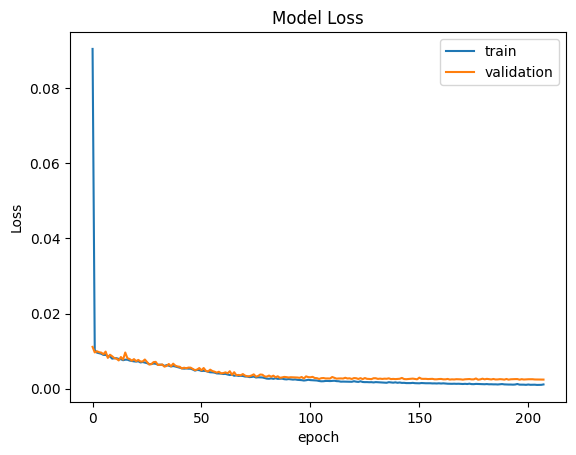

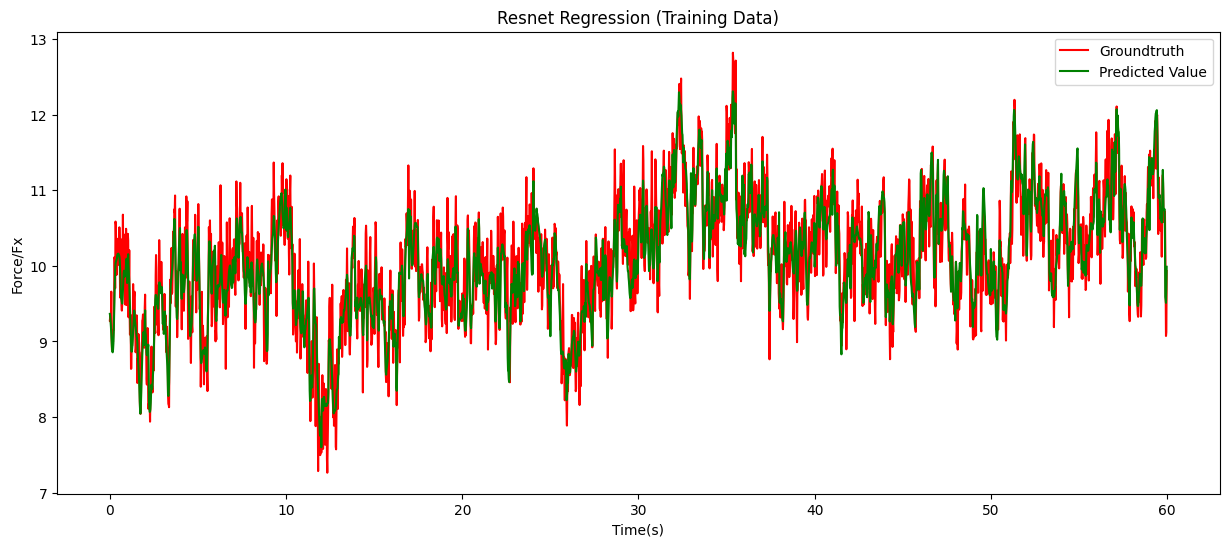

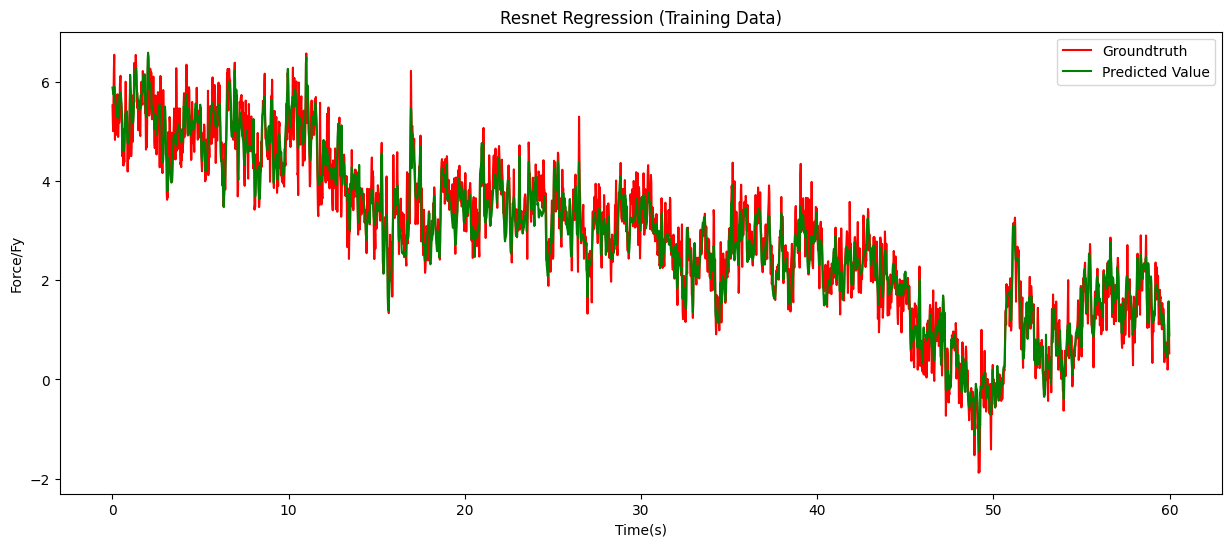

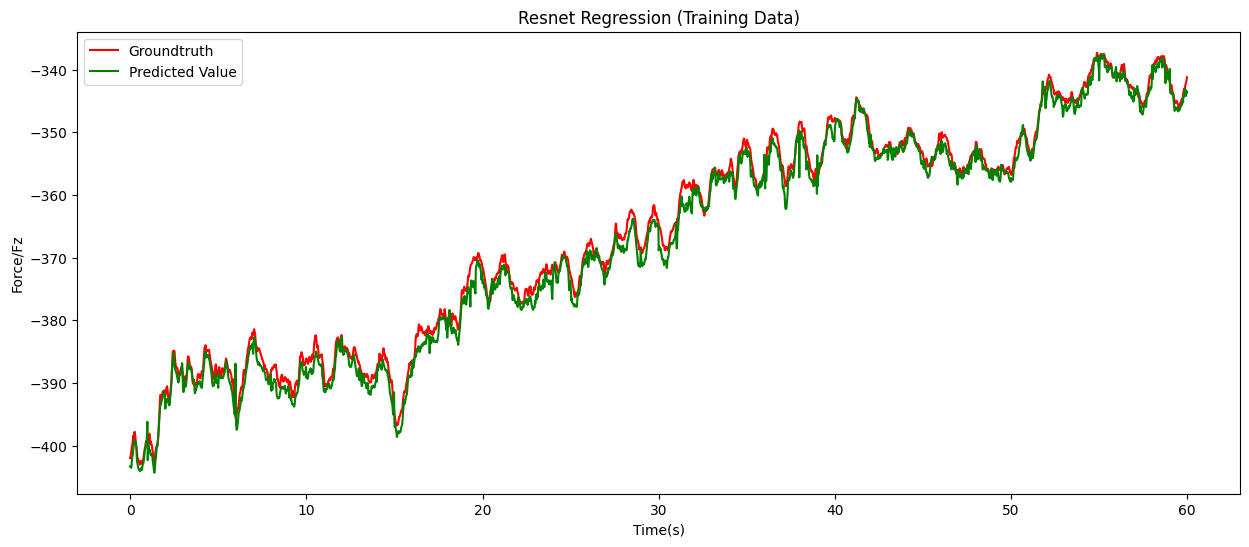

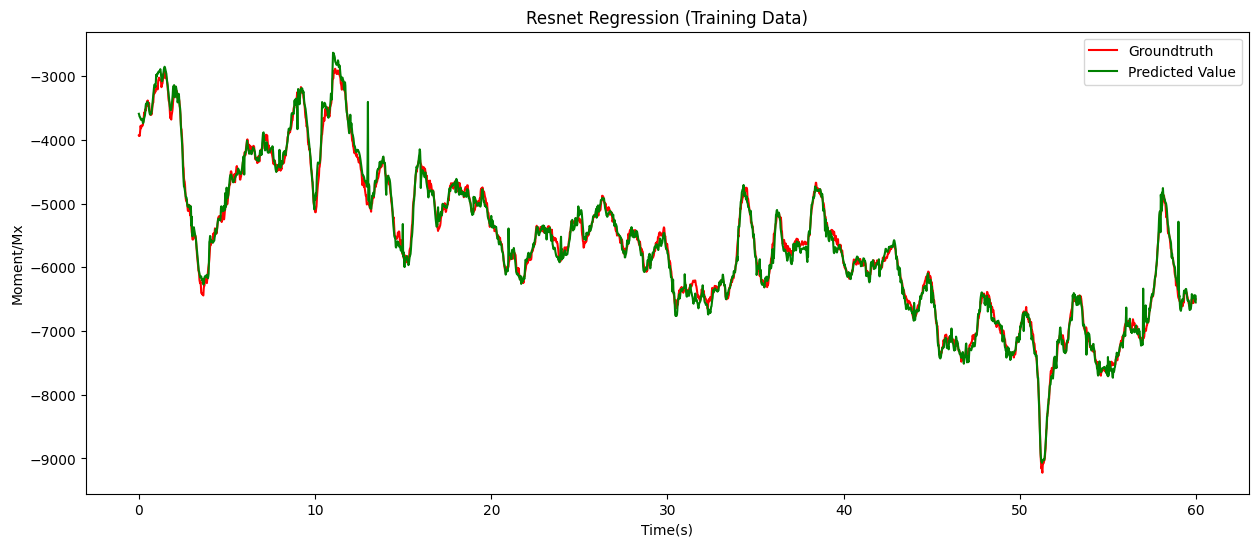

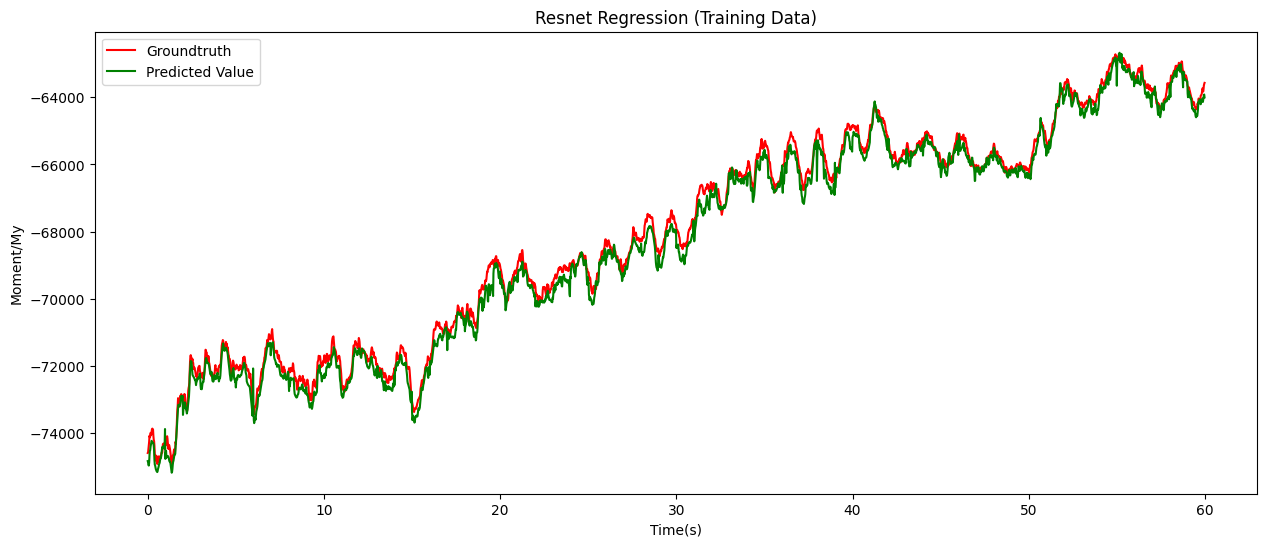

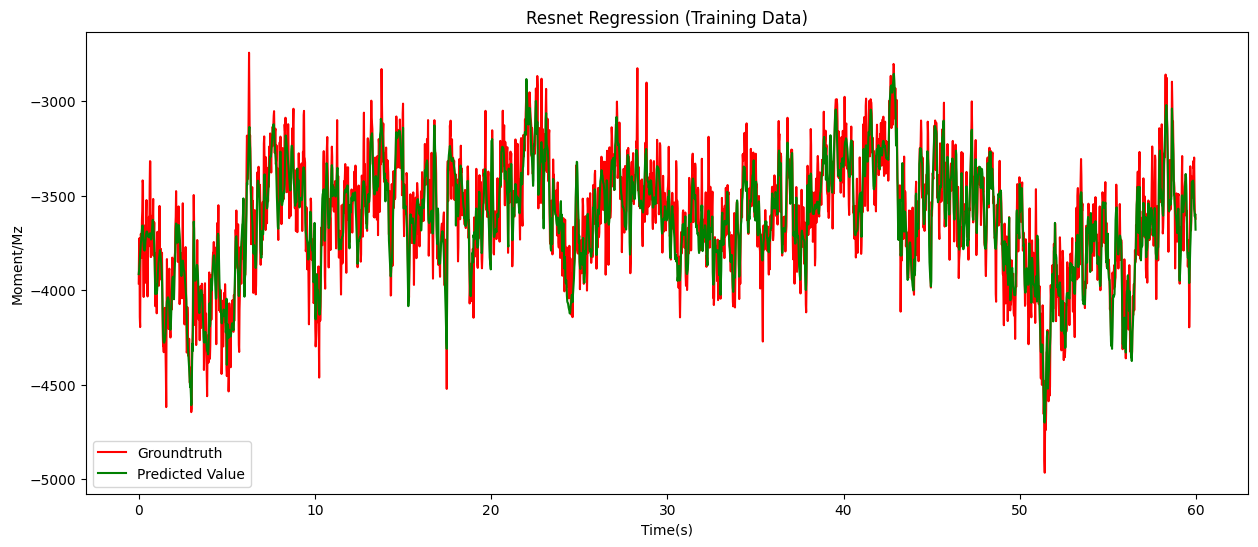

188/188 [==============================] - 1s 4ms/step


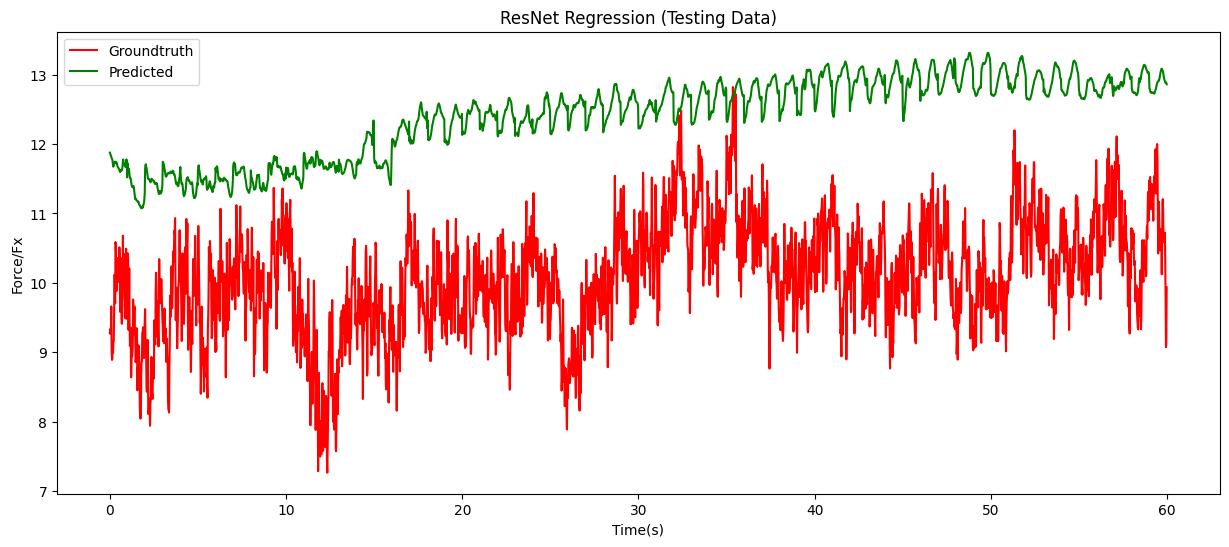

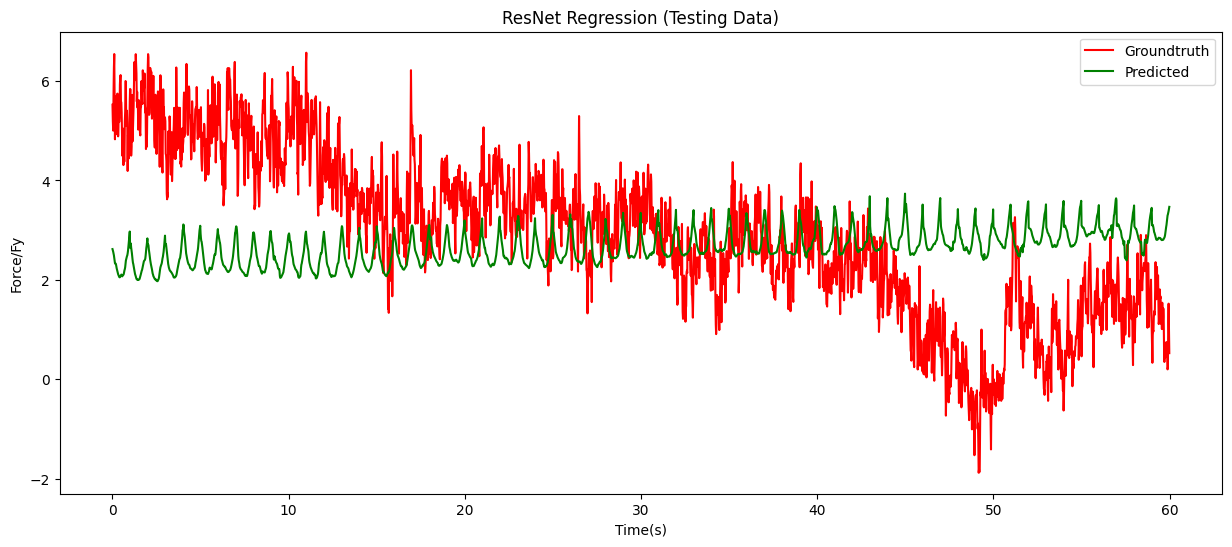

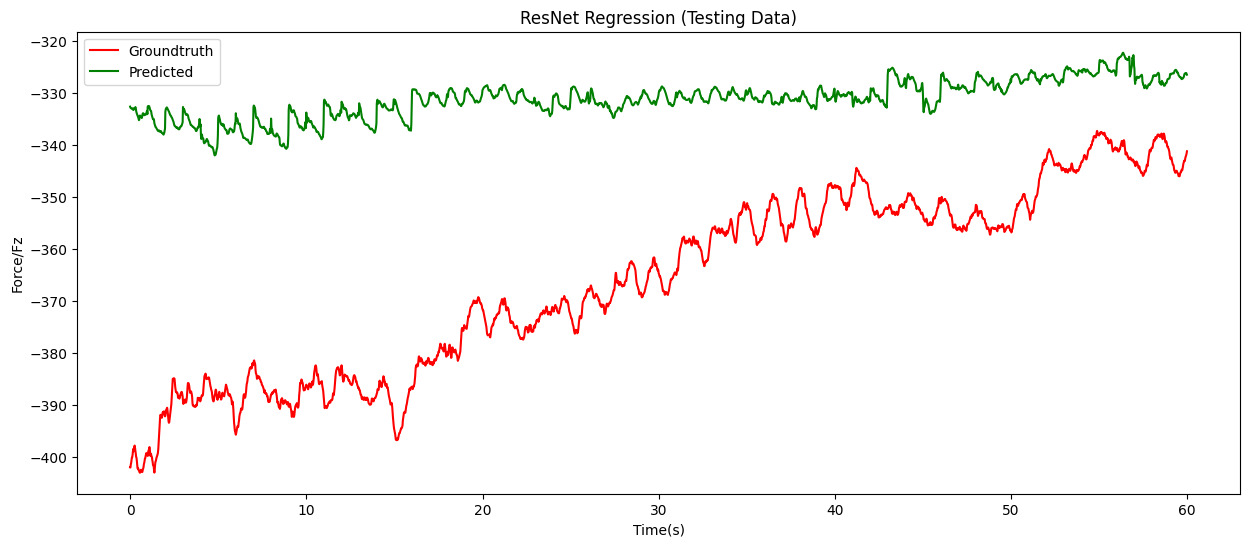

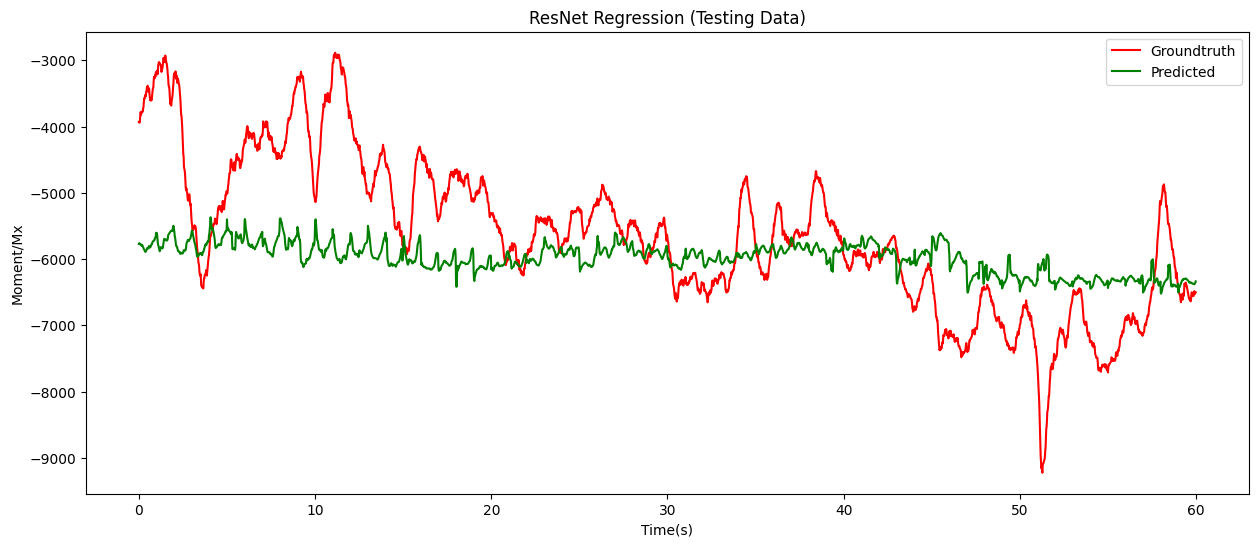

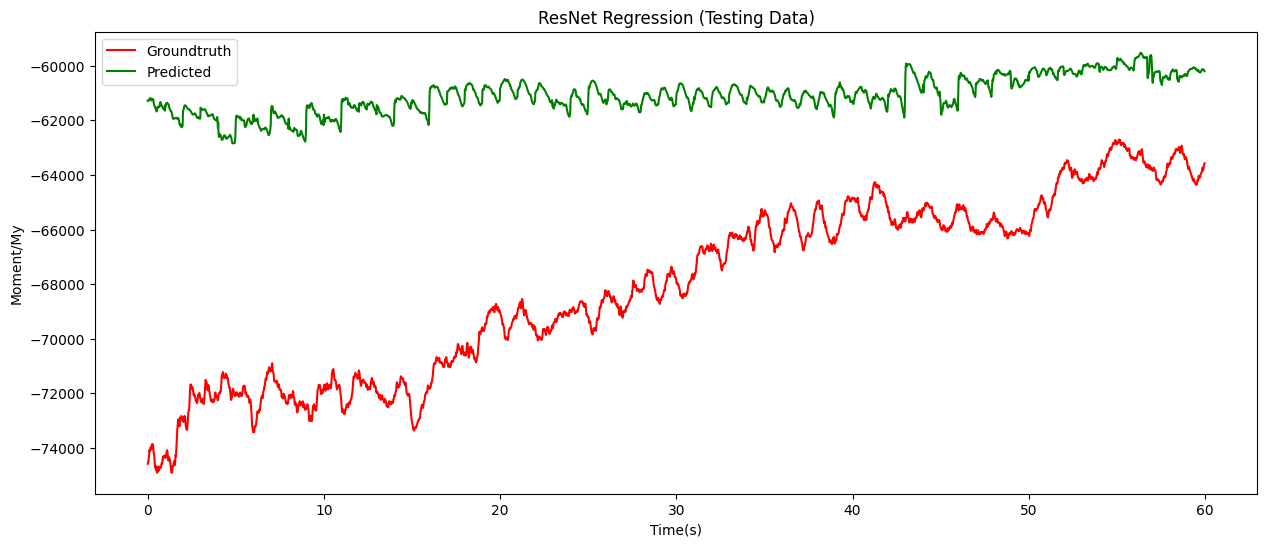

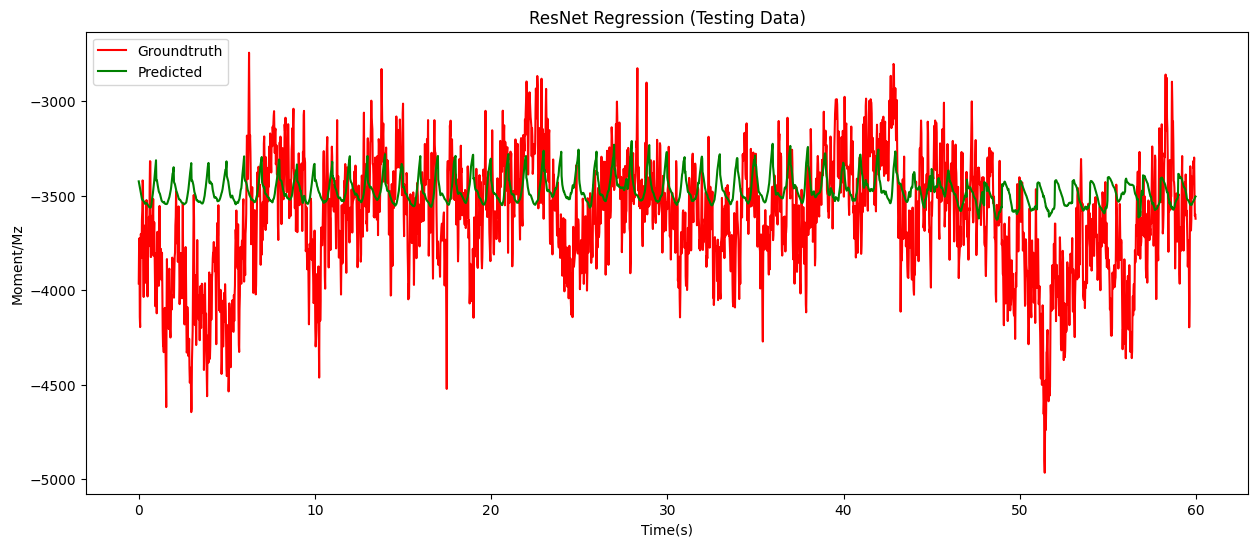

In [8]:
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, r2_score

# Training Process
Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
SIData =  np.asarray(Insole)

df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
columns = ['Fx','Fy','Fz','Mx','My','Mz']
selected_df = df[columns]
FPDatas = selected_df[:]

SmartInsole = np.array(SIData[:]).astype('float32')
FPData = np.array(FPDatas).astype('float32')

SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(SmartInsole[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
#     coeffs[-2] = np.zeros_like(coeffs[-2])
#     coeffs[-3] = np.zeros_like(coeffs[-3])
#     coeffs[-4] = np.zeros_like(coeffs[-4])
#     coeffs[-5] = np.zeros_like(coeffs[-5])
#     coeffs[-6] = np.zeros_like(coeffs[-6])
    SIDWTcoeffs.append(coeffs)

SIData_filtered = np.zeros(SmartInsole.shape)
for i in range(89):
    SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)

max_iter = 50
iter = 0
for i in range(len(SIData_filtered)):
    SIData_filtered[i][0] = SIData_filtered[i][0] + (iter % max_iter) + 1
    iter += 1

# Scale the smart insole data
minInsole = SIData_filtered.min()
maxInsole = SIData_filtered.max()
smart_insole_data_scaled = (SIData_filtered - minInsole) / ( maxInsole - minInsole )

# Scale the force plate data
minForcePlateFx = FPData[:,0].min()
maxForcePlateFx = FPData[:,0].max()
minForcePlateFy = FPData[:,1].min()
maxForcePlateFy = FPData[:,1].max()
minForcePlateFz = FPData[:,2].min()
maxForcePlateFz = FPData[:,2].max()
minForcePlateMx = FPData[:,3].min()
maxForcePlateMx = FPData[:,3].max()
minForcePlateMy = FPData[:,4].min()
maxForcePlateMy = FPData[:,4].max()
minForcePlateMz = FPData[:,5].min()
maxForcePlateMz = FPData[:,5].max()
force_plate_data_scaled_Fx = (FPData[:,0] - minForcePlateFx) / ( maxForcePlateFx - minForcePlateFx )
force_plate_data_scaled_Fy = (FPData[:,1] - minForcePlateFy) / ( maxForcePlateFy - minForcePlateFy )
force_plate_data_scaled_Fz = (FPData[:,2] - minForcePlateFz) / ( maxForcePlateFz - minForcePlateFz )
force_plate_data_scaled_Mx = (FPData[:,3] - minForcePlateMx) / ( maxForcePlateMx - minForcePlateMx )
force_plate_data_scaled_My = (FPData[:,4] - minForcePlateMy) / ( maxForcePlateMy - minForcePlateMy )
force_plate_data_scaled_Mz = (FPData[:,5] - minForcePlateMz) / ( maxForcePlateMz - minForcePlateMz )
force_plate_data_scaled = np.concatenate((force_plate_data_scaled_Fx.reshape(-1,1), force_plate_data_scaled_Fy.reshape(-1,1),
                                          force_plate_data_scaled_Fz.reshape(-1,1), force_plate_data_scaled_Mx.reshape(-1,1), 
                                          force_plate_data_scaled_My.reshape(-1,1), force_plate_data_scaled_Mz.reshape(-1,1)), axis=1)

#Spliting Data
sample_size = smart_insole_data_scaled.shape[0] # number of samples in train set
time_steps  = smart_insole_data_scaled.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

train_data_reshaped = smart_insole_data_scaled.reshape(sample_size,time_steps,input_dimension)

X_train, X_test, y_train, y_test = train_test_split(train_data_reshaped[:10000], force_plate_data_scaled[:10000], test_size=0.20, random_state=2)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

"Configurations for ResNet in Regression Mode"
length = X_train.shape[1]   # Number of Features (or length of the signal)
model_width = 64           # Number of Filter or Kernel in the Input Layer
num_channel = 1             # Number of Input Channels
problem_type = 'Regression' # Regression or Classification
output_number = 6           # Number of Outputs in the Regression Mode

Regression_Model = ResNet(length, num_channel, model_width, problem_type=problem_type, 
                          output_nums=output_number).ResNet18()
Regression_Model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics= ['mse']) # Compile Model

Regression_Model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=30, mode='min'), ModelCheckpoint('Saved_Model.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='min')]
history = Regression_Model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1, validation_split=0.2, shuffle=True, callbacks=callbacks)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
# plt.show()
plt.savefig('Loss Result.png')

#Evaluate Model
Regression_Model.evaluate(train_data_reshaped[:10000], force_plate_data_scaled[:10000])
pred = Regression_Model.predict(train_data_reshaped[:10000])

print('MSE: ',mean_squared_error(force_plate_data_scaled[:10000], pred))
print('RMSE: ',math.sqrt(mean_squared_error(force_plate_data_scaled[:10000], pred)))
print('Coefficient of determination (r2 Score): ', r2_score(force_plate_data_scaled[:10000], pred))

# Inverse transform the predictions and actual values
y_real_Fx = (force_plate_data_scaled[:10000,0] * (maxForcePlateFx - minForcePlateFx)) + minForcePlateFx
y_real_Fy = (force_plate_data_scaled[:10000,1] * (maxForcePlateFy - minForcePlateFy)) + minForcePlateFy
y_real_Fz = (force_plate_data_scaled[:10000,2] * (maxForcePlateFz - minForcePlateFz)) + minForcePlateFz
y_real_Mx = (force_plate_data_scaled[:10000,3] * (maxForcePlateMx - minForcePlateMx)) + minForcePlateMx
y_real_My = (force_plate_data_scaled[:10000,4] * (maxForcePlateMy - minForcePlateMy)) + minForcePlateMy
y_real_Mz = (force_plate_data_scaled[:10000,5] * (maxForcePlateMz - minForcePlateMz)) + minForcePlateMz
y_real = np.concatenate((y_real_Fx.reshape(-1,1), y_real_Fy.reshape(-1,1), y_real_Fz.reshape(-1,1),
                         y_real_Mx.reshape(-1,1), y_real_My.reshape(-1,1), y_real_Mz.reshape(-1,1)), axis=1)

y_pred_Fx = (pred[:10000,0] * (maxForcePlateFx - minForcePlateFx)) + minForcePlateFx
y_pred_Fy = (pred[:10000,1] * (maxForcePlateFy - minForcePlateFy)) + minForcePlateFy
y_pred_Fz = (pred[:10000,2] * (maxForcePlateFz - minForcePlateFz)) + minForcePlateFz
y_pred_Mx = (pred[:10000,3] * (maxForcePlateMx - minForcePlateMx)) + minForcePlateMx
y_pred_My = (pred[:10000,4] * (maxForcePlateMy - minForcePlateMy)) + minForcePlateMy
y_pred_Mz = (pred[:10000,5] * (maxForcePlateMz - minForcePlateMz)) + minForcePlateMz
y_pred = np.concatenate((y_pred_Fx.reshape(-1,1), y_pred_Fy.reshape(-1,1), y_pred_Fz.reshape(-1,1),
                         y_pred_Mx.reshape(-1,1), y_pred_My.reshape(-1,1), y_pred_Mz.reshape(-1,1)), axis=1)


print('MSE: ',mean_squared_error(y_real, y_pred))
print('RMSE: ',math.sqrt(mean_squared_error(y_real, y_pred)))
print('Coefficient of determination (r2 Score): ', r2_score(y_real, y_pred))

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,3000)*60/3000 
for i in range(0,6):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,y_real[0:3000,i],color='red')
    plt.plot(x,y_pred[0:3000,i], markerfacecolor='none',color='green')
    plt.title('Resnet Regression (Training Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
    plt.show()

tf.keras.models.save_model(Regression_Model, '1ouput.h5')
#End Training Process

# Load Model to Predict Real Data
modelCoy = tf.keras.models.load_model('1ouput.h5')

Test_Insole = pd.read_csv('0310AyuStand5Min2.txt', header=None, low_memory=False)
TestSIData =  np.asarray(Test_Insole)

Test_df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
Test_columns = ['Fx','Fy','Fz','Mx','My','Mz']
Test_selected_df = Test_df[Test_columns]
Test_FPDatas = Test_selected_df[:6000]

Test_SmartInsole = np.array(TestSIData[:6000]).astype('float32')
Test_FPData = np.array(Test_FPDatas).astype('float32')

SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(Test_SmartInsole[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
#     coeffs[-2] = np.zeros_like(coeffs[-2])
#     coeffs[-3] = np.zeros_like(coeffs[-3])
#     coeffs[-4] = np.zeros_like(coeffs[-4])
#     coeffs[-5] = np.zeros_like(coeffs[-5])
#     coeffs[-6] = np.zeros_like(coeffs[-6])
    SIDWTcoeffs.append(coeffs)

Test_SIData_filtered = np.zeros(Test_SmartInsole.shape)
for i in range(89):
    Test_SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)


for i in range(len(Test_SIData_filtered)):
    Test_SIData_filtered[i][0] = Test_SIData_filtered[i][0] + (iter % max_iter) + 1
    iter += 1

Test_smart_insole_data_scaled = (Test_SIData_filtered - minInsole) / ( maxInsole - minInsole )    
Test_force_plate_data_scaled_Fx = (Test_FPData[:,0] - minForcePlateFx) / ( maxForcePlateFx - minForcePlateFx )
Test_force_plate_data_scaled_Fy = (Test_FPData[:,1] - minForcePlateFy) / ( maxForcePlateFy - minForcePlateFy )
Test_force_plate_data_scaled_Fz = (Test_FPData[:,2] - minForcePlateFz) / ( maxForcePlateFz - minForcePlateFz )
Test_force_plate_data_scaled_Mx = (Test_FPData[:,3] - minForcePlateMx) / ( maxForcePlateMx - minForcePlateMx )
Test_force_plate_data_scaled_My = (Test_FPData[:,4] - minForcePlateMy) / ( maxForcePlateMy - minForcePlateMy )
Test_force_plate_data_scaled_Mz = (Test_FPData[:,5] - minForcePlateMz) / ( maxForcePlateMz - minForcePlateMz )
Test_force_plate_data_scaled = np.concatenate((Test_force_plate_data_scaled_Fx.reshape(-1,1), Test_force_plate_data_scaled_Fy.reshape(-1,1), 
                                               Test_force_plate_data_scaled_Fz.reshape(-1,1), Test_force_plate_data_scaled_Mx.reshape(-1,1), 
                                               Test_force_plate_data_scaled_My.reshape(-1,1), Test_force_plate_data_scaled_Mz.reshape(-1,1)), axis=1)

Test_sample_size = Test_smart_insole_data_scaled.shape[0]
Test_time_steps  = Test_smart_insole_data_scaled.shape[1]
Test_input_dimension = 1

Test_train_data_reshaped = Test_smart_insole_data_scaled.reshape(Test_sample_size,Test_time_steps,Test_input_dimension)

modelCoy.evaluate(Test_train_data_reshaped, Test_force_plate_data_scaled)
Test_Pred = modelCoy.predict(Test_train_data_reshaped)

Test_y_real_Fx = (Test_force_plate_data_scaled[:10000,0] * (maxForcePlateFx - minForcePlateFx)) + minForcePlateFx
Test_y_real_Fy = (Test_force_plate_data_scaled[:10000,1] * (maxForcePlateFy - minForcePlateFy)) + minForcePlateFy
Test_y_real_Fz = (Test_force_plate_data_scaled[:10000,2] * (maxForcePlateFz - minForcePlateFz)) + minForcePlateFz
Test_y_real_Mx = (Test_force_plate_data_scaled[:10000,3] * (maxForcePlateMx - minForcePlateMx)) + minForcePlateMx
Test_y_real_My = (Test_force_plate_data_scaled[:10000,4] * (maxForcePlateMy - minForcePlateMy)) + minForcePlateMy
Test_y_real_Mz = (Test_force_plate_data_scaled[:10000,5] * (maxForcePlateMz - minForcePlateMz)) + minForcePlateMz
Test_y_real = np.concatenate((Test_y_real_Fx.reshape(-1,1), Test_y_real_Fy.reshape(-1,1), Test_y_real_Fz.reshape(-1,1),
                              Test_y_real_Mx.reshape(-1,1), Test_y_real_My.reshape(-1,1), Test_y_real_Mz.reshape(-1,1)), axis=1)

Test_y_pred_Fx = (Test_Pred[:10000,0] * (maxForcePlateFx - minForcePlateFx)) + minForcePlateFx
Test_y_pred_Fy = (Test_Pred[:10000,1] * (maxForcePlateFy - minForcePlateFy)) + minForcePlateFy
Test_y_pred_Fz = (Test_Pred[:10000,2] * (maxForcePlateFz - minForcePlateFz)) + minForcePlateFz
Test_y_pred_Mx = (Test_Pred[:10000,3] * (maxForcePlateMx - minForcePlateMx)) + minForcePlateMx
Test_y_pred_My = (Test_Pred[:10000,4] * (maxForcePlateMy - minForcePlateMy)) + minForcePlateMy
Test_y_pred_Mz = (Test_Pred[:10000,5] * (maxForcePlateMz - minForcePlateMz)) + minForcePlateMz
Test_y_pred = np.concatenate((Test_y_pred_Fx.reshape(-1,1), Test_y_pred_Fy.reshape(-1,1), Test_y_pred_Fz.reshape(-1,1),
                              Test_y_pred_Mx.reshape(-1,1), Test_y_pred_My.reshape(-1,1), Test_y_pred_Mz.reshape(-1,1)), axis=1)

x=[]
x = np.arange(0,3000)*60/3000 
for i in range(0,6):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Test_y_real[0:3000,i],color='red')
    plt.plot(x,Test_y_pred[0:3000,i], markerfacecolor='none',color='green')
    plt.title('ResNet Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()
    
# please help me make normalization process manualy dont use the sickit-learn on this process

313/313 [==============================] - 1s 4ms/step


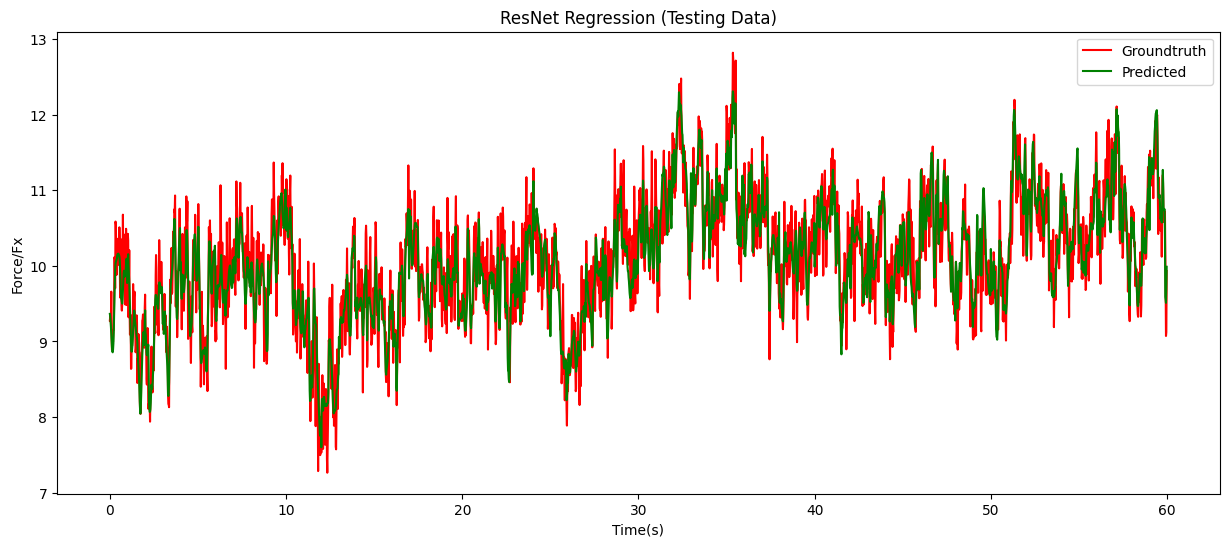

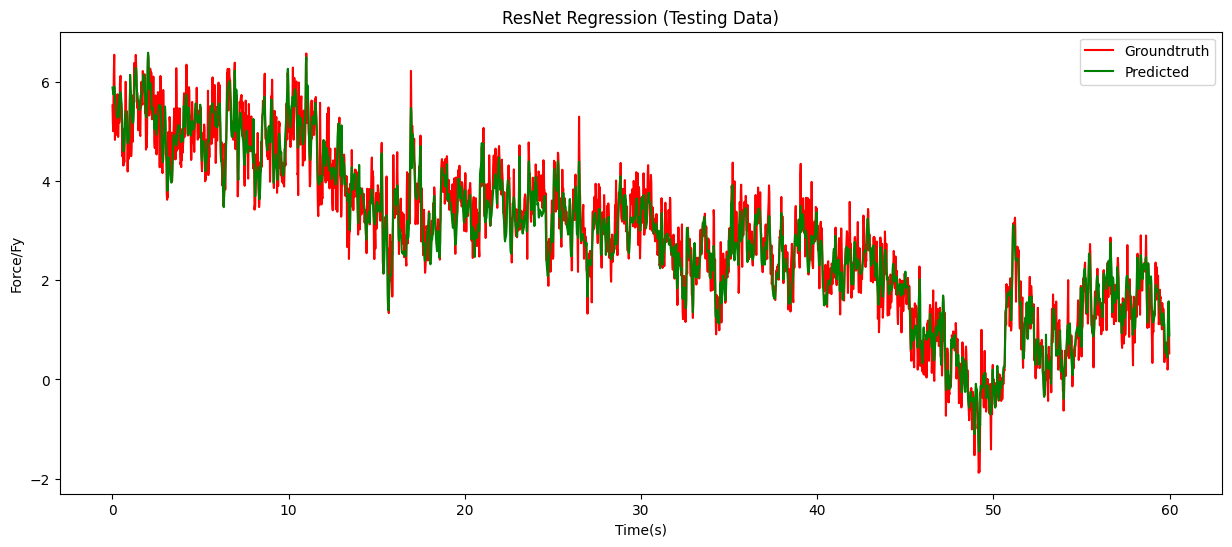

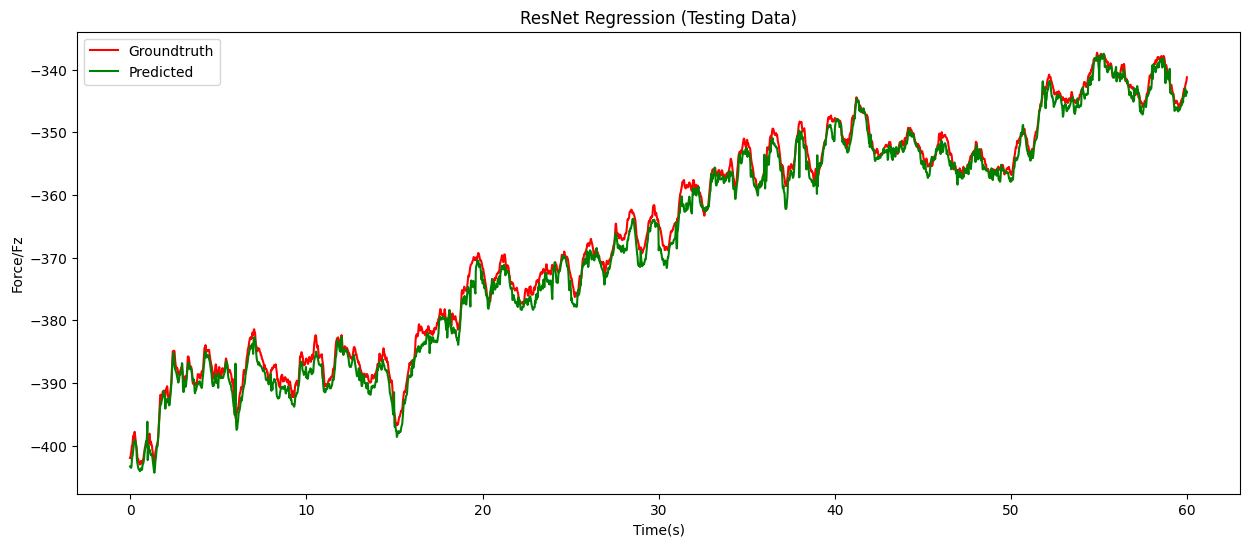

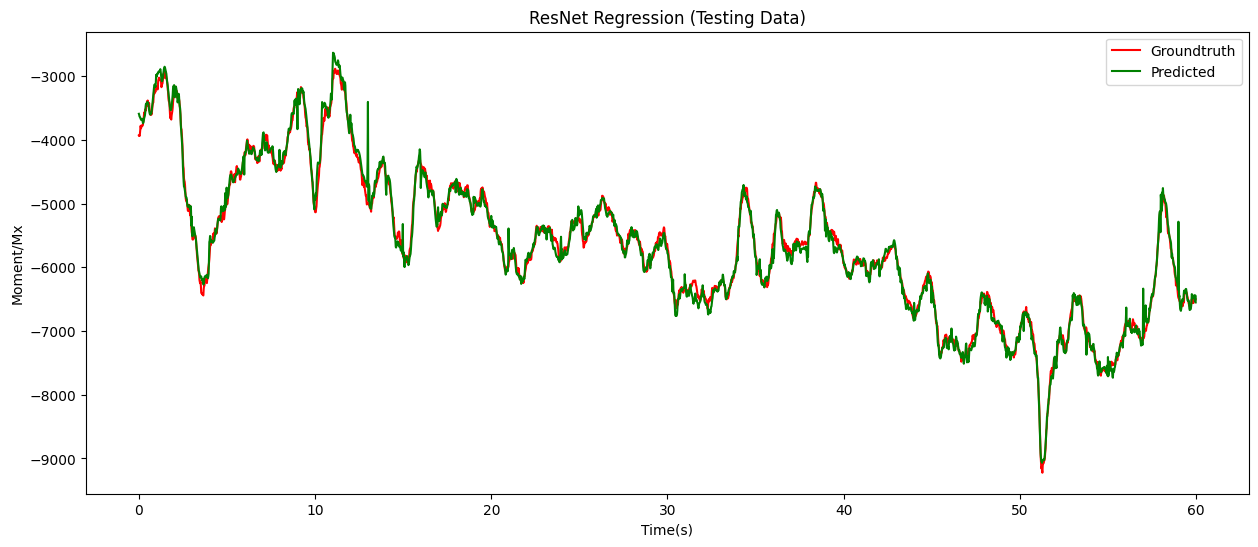

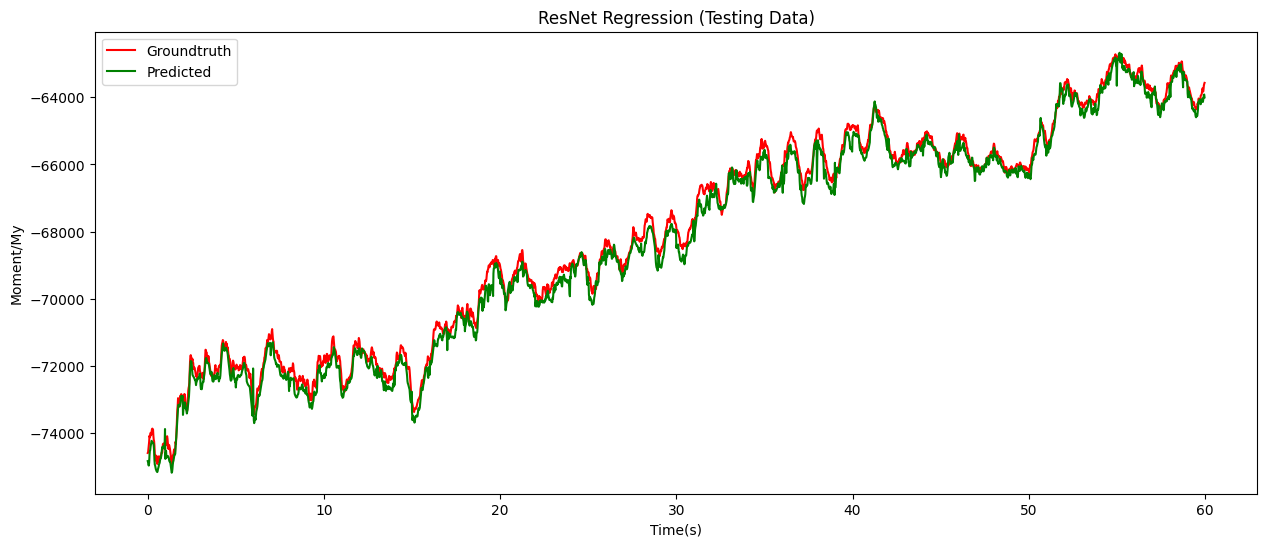

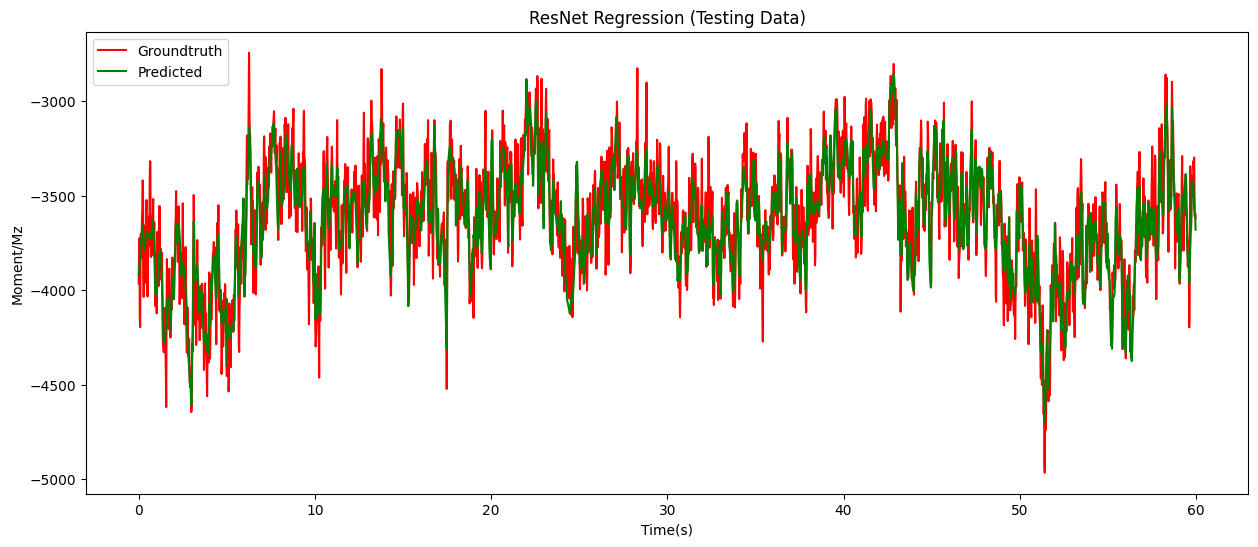

In [9]:
# Load Model to Predict Real Data
Test_Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
TestSIData =  np.asarray(Test_Insole)

Test_df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
Test_selected_df = Test_df[columns]
Test_FPDatas = Test_selected_df[:10000]

Test_SmartInsole = np.array(TestSIData[:10000]).astype('float32')
Test_FPData = np.array(Test_FPDatas).astype('float32')

SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(Test_SmartInsole[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
#     coeffs[-2] = np.zeros_like(coeffs[-2])
#     coeffs[-3] = np.zeros_like(coeffs[-3])
#     coeffs[-4] = np.zeros_like(coeffs[-4])
#     coeffs[-5] = np.zeros_like(coeffs[-5])
#     coeffs[-6] = np.zeros_like(coeffs[-6])
    SIDWTcoeffs.append(coeffs)

Test_SIData_filtered = np.zeros(Test_SmartInsole.shape)
for i in range(89):
    Test_SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)

for i in range(len(Test_SIData_filtered)):
    Test_SIData_filtered[i][0] = Test_SIData_filtered[i][0] + (iter % max_iter) + 1
    iter += 1

Test_smart_insole_data_scaled = (Test_SIData_filtered - minInsole) / ( maxInsole - minInsole )   
Test_force_plate_data_scaled_Fx = (Test_FPData[:,0] - minForcePlateFx) / ( maxForcePlateFx - minForcePlateFx )
Test_force_plate_data_scaled_Fy = (Test_FPData[:,1] - minForcePlateFy) / ( maxForcePlateFy - minForcePlateFy )
Test_force_plate_data_scaled_Fz = (Test_FPData[:,2] - minForcePlateFz) / ( maxForcePlateFz - minForcePlateFz )
Test_force_plate_data_scaled_Mx = (Test_FPData[:,3] - minForcePlateMx) / ( maxForcePlateMx - minForcePlateMx )
Test_force_plate_data_scaled_My = (Test_FPData[:,4] - minForcePlateMy) / ( maxForcePlateMy - minForcePlateMy )
Test_force_plate_data_scaled_Mz = (Test_FPData[:,5] - minForcePlateMz) / ( maxForcePlateMz - minForcePlateMz )
Test_force_plate_data_scaled = np.concatenate((Test_force_plate_data_scaled_Fx.reshape(-1,1), Test_force_plate_data_scaled_Fy.reshape(-1,1), 
                                               Test_force_plate_data_scaled_Fz.reshape(-1,1), Test_force_plate_data_scaled_Mx.reshape(-1,1), 
                                               Test_force_plate_data_scaled_My.reshape(-1,1), Test_force_plate_data_scaled_Mz.reshape(-1,1)), axis=1)

Test_sample_size = Test_smart_insole_data_scaled.shape[0]
Test_time_steps  = Test_smart_insole_data_scaled.shape[1]
Test_input_dimension = 1

Test_train_data_reshaped = Test_smart_insole_data_scaled.reshape(Test_sample_size,Test_time_steps,Test_input_dimension)

modelCoy.evaluate(Test_train_data_reshaped, Test_force_plate_data_scaled)
Test_Pred = modelCoy.predict(Test_train_data_reshaped)

Test_y_real_Fx = (Test_force_plate_data_scaled[:10000,0] * (maxForcePlateFx - minForcePlateFx)) + minForcePlateFx
Test_y_real_Fy = (Test_force_plate_data_scaled[:10000,1] * (maxForcePlateFy - minForcePlateFy)) + minForcePlateFy
Test_y_real_Fz = (Test_force_plate_data_scaled[:10000,2] * (maxForcePlateFz - minForcePlateFz)) + minForcePlateFz
Test_y_real_Mx = (Test_force_plate_data_scaled[:10000,3] * (maxForcePlateMx - minForcePlateMx)) + minForcePlateMx
Test_y_real_My = (Test_force_plate_data_scaled[:10000,4] * (maxForcePlateMy - minForcePlateMy)) + minForcePlateMy
Test_y_real_Mz = (Test_force_plate_data_scaled[:10000,5] * (maxForcePlateMz - minForcePlateMz)) + minForcePlateMz
Test_y_real = np.concatenate((Test_y_real_Fx.reshape(-1,1), Test_y_real_Fy.reshape(-1,1), Test_y_real_Fz.reshape(-1,1),
                              Test_y_real_Mx.reshape(-1,1), Test_y_real_My.reshape(-1,1), Test_y_real_Mz.reshape(-1,1)), axis=1)

Test_y_pred_Fx = (Test_Pred[:10000,0] * (maxForcePlateFx - minForcePlateFx)) + minForcePlateFx
Test_y_pred_Fy = (Test_Pred[:10000,1] * (maxForcePlateFy - minForcePlateFy)) + minForcePlateFy
Test_y_pred_Fz = (Test_Pred[:10000,2] * (maxForcePlateFz - minForcePlateFz)) + minForcePlateFz
Test_y_pred_Mx = (Test_Pred[:10000,3] * (maxForcePlateMx - minForcePlateMx)) + minForcePlateMx
Test_y_pred_My = (Test_Pred[:10000,4] * (maxForcePlateMy - minForcePlateMy)) + minForcePlateMy
Test_y_pred_Mz = (Test_Pred[:10000,5] * (maxForcePlateMz - minForcePlateMz)) + minForcePlateMz
Test_y_pred = np.concatenate((Test_y_pred_Fx.reshape(-1,1), Test_y_pred_Fy.reshape(-1,1), Test_y_pred_Fz.reshape(-1,1),
                              Test_y_pred_Mx.reshape(-1,1), Test_y_pred_My.reshape(-1,1), Test_y_pred_Mz.reshape(-1,1)), axis=1)

x=[]
x = np.arange(0,3000)*60/3000 
for i in range(0,6):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Test_y_real[0:3000,i],color='red')
    plt.plot(x,Test_y_pred[0:3000,i], markerfacecolor='none',color='green')
    plt.title('ResNet Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()
    
    
# please help me make normalization process manualy dont use the sickit-learn on this process

157/157 [==============================] - 1s 4ms/step


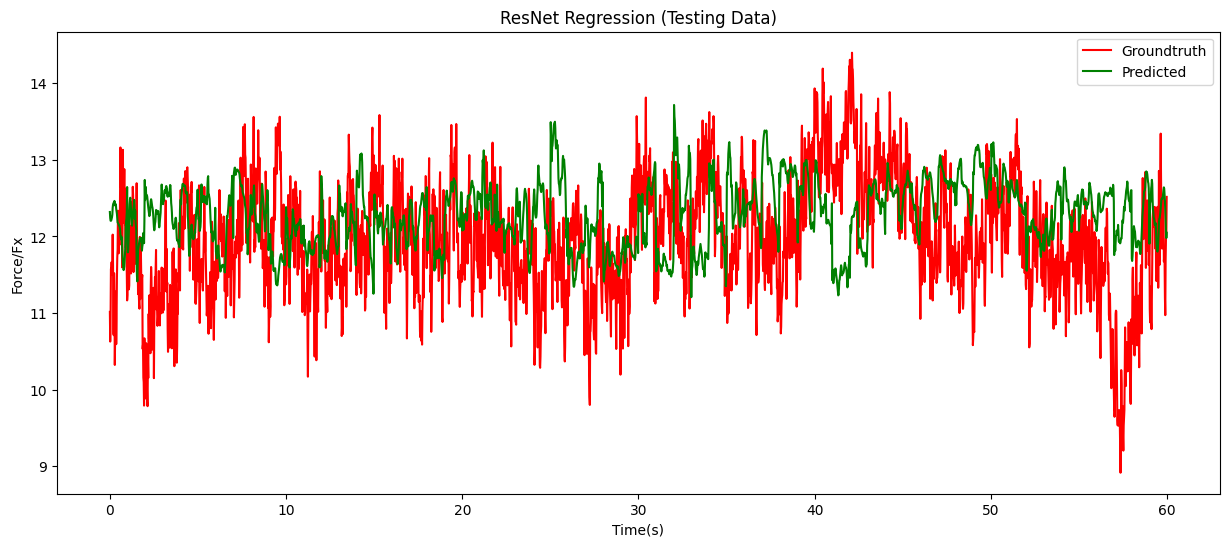

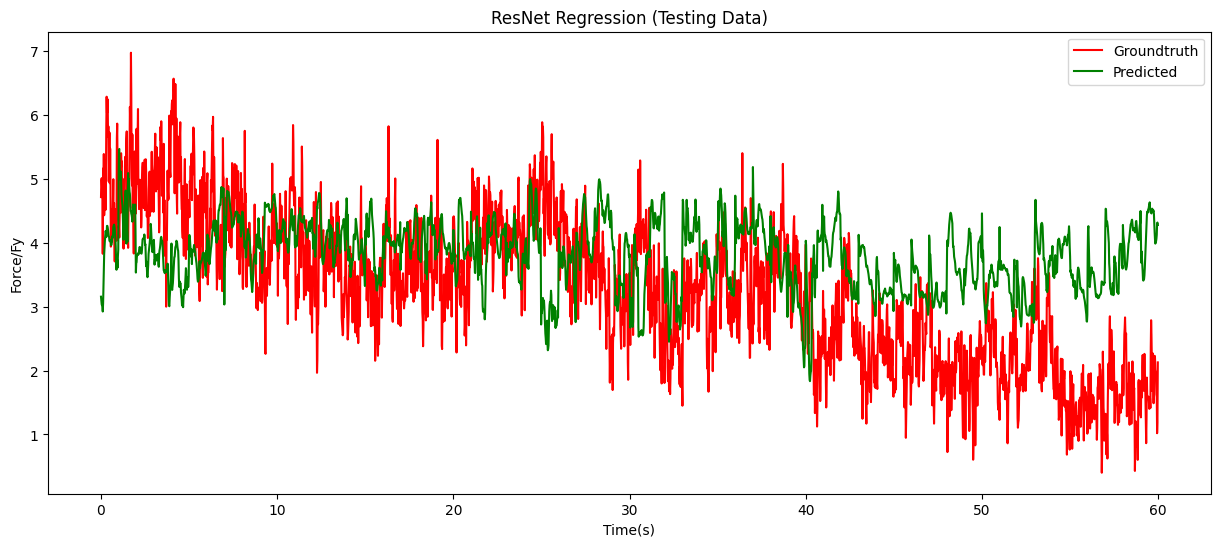

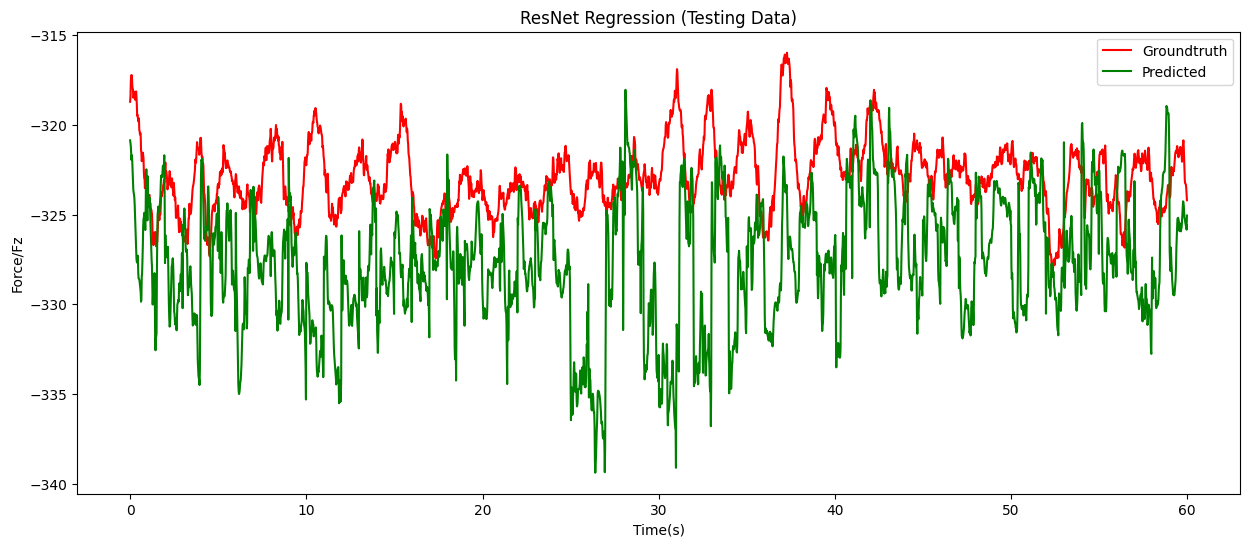

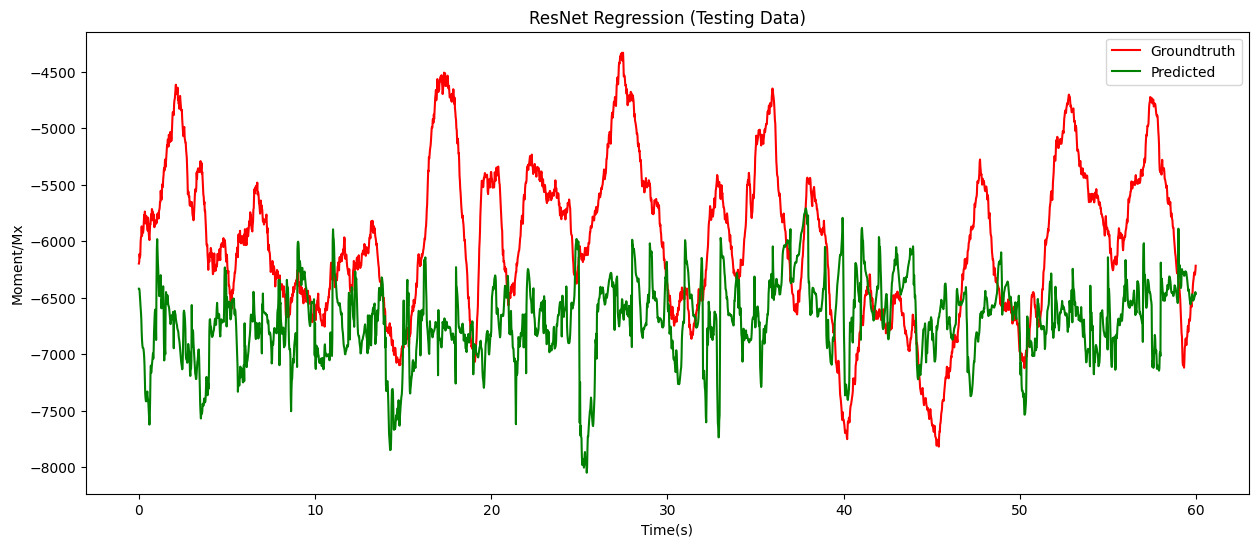

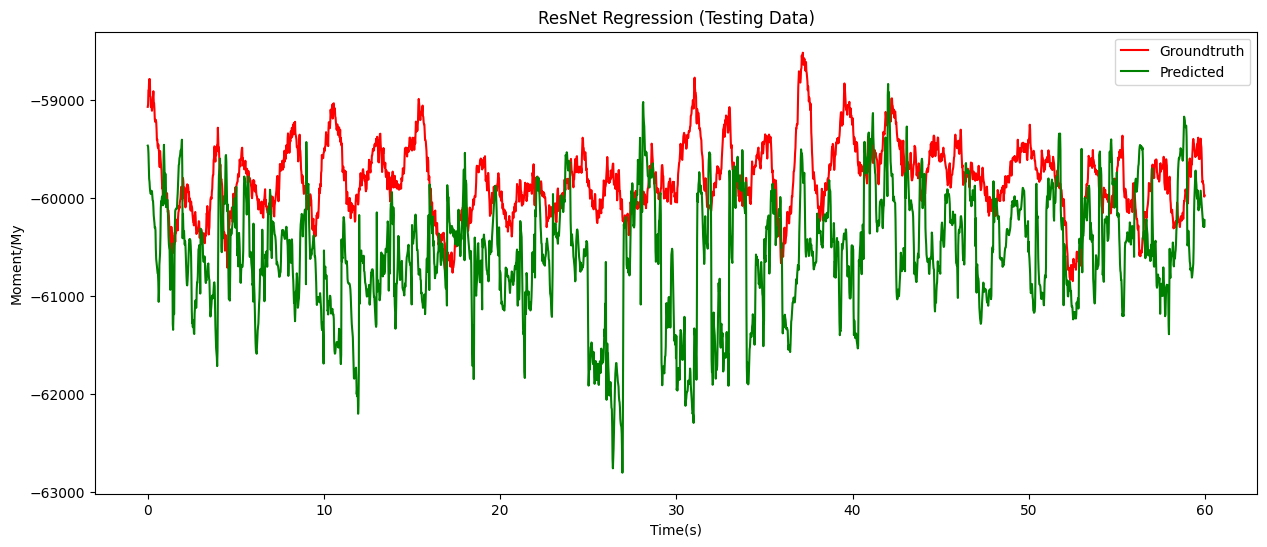

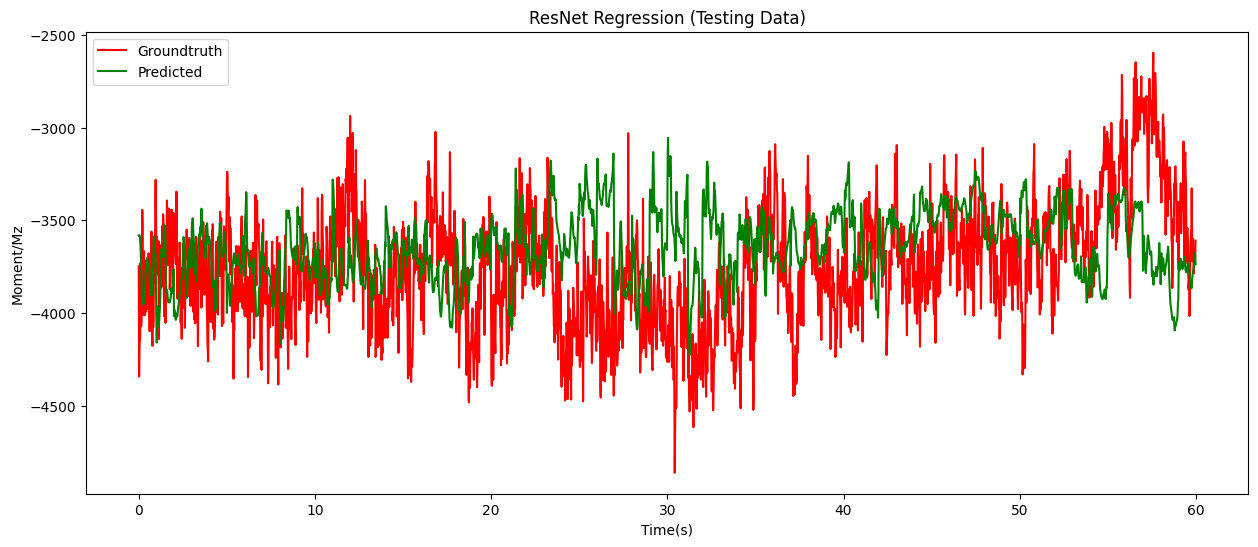

In [14]:
# Load Model to Predict Real Data
Test_Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
TestSIData =  np.asarray(Test_Insole)

Test_df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
Test_selected_df = Test_df[columns]
Test_FPDatas = Test_selected_df[10000:]

Test_SmartInsole = np.array(TestSIData[10000:]).astype('float32')
Test_FPData = np.array(Test_FPDatas).astype('float32')

SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(Test_SmartInsole[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
#     coeffs[-2] = np.zeros_like(coeffs[-2])
#     coeffs[-3] = np.zeros_like(coeffs[-3])
#     coeffs[-4] = np.zeros_like(coeffs[-4])
#     coeffs[-5] = np.zeros_like(coeffs[-5])
#     coeffs[-6] = np.zeros_like(coeffs[-6])
    SIDWTcoeffs.append(coeffs)

Test_SIData_filtered = np.zeros(Test_SmartInsole.shape)
for i in range(89):
    Test_SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)

for i in range(len(Test_SIData_filtered)):
    Test_SIData_filtered[i][0] = Test_SIData_filtered[i][0] + (iter % max_iter) + 1
    iter += 1

Test_smart_insole_data_scaled = (Test_SIData_filtered - minInsole) / ( maxInsole - minInsole )
Test_force_plate_data_scaled_Fx = (Test_FPData[:,0] - minForcePlateFx) / ( maxForcePlateFx - minForcePlateFx )
Test_force_plate_data_scaled_Fy = (Test_FPData[:,1] - minForcePlateFy) / ( maxForcePlateFy - minForcePlateFy )
Test_force_plate_data_scaled_Fz = (Test_FPData[:,2] - minForcePlateFz) / ( maxForcePlateFz - minForcePlateFz )
Test_force_plate_data_scaled_Mx = (Test_FPData[:,3] - minForcePlateMx) / ( maxForcePlateMx - minForcePlateMx )
Test_force_plate_data_scaled_My = (Test_FPData[:,4] - minForcePlateMy) / ( maxForcePlateMy - minForcePlateMy )
Test_force_plate_data_scaled_Mz = (Test_FPData[:,5] - minForcePlateMz) / ( maxForcePlateMz - minForcePlateMz )
Test_force_plate_data_scaled = np.concatenate((Test_force_plate_data_scaled_Fx.reshape(-1,1), Test_force_plate_data_scaled_Fy.reshape(-1,1), 
                                               Test_force_plate_data_scaled_Fz.reshape(-1,1), Test_force_plate_data_scaled_Mx.reshape(-1,1), 
                                               Test_force_plate_data_scaled_My.reshape(-1,1), Test_force_plate_data_scaled_Mz.reshape(-1,1)), axis=1)

Test_sample_size = Test_smart_insole_data_scaled.shape[0]
Test_time_steps  = Test_smart_insole_data_scaled.shape[1]
Test_input_dimension = 1

Test_train_data_reshaped = Test_smart_insole_data_scaled.reshape(Test_sample_size,Test_time_steps,Test_input_dimension)

modelCoy.evaluate(Test_train_data_reshaped, Test_force_plate_data_scaled)
Test_Pred = modelCoy.predict(Test_train_data_reshaped)

Test_y_real_Fx = (Test_force_plate_data_scaled[:10000,0] * (maxForcePlateFx - minForcePlateFx)) + minForcePlateFx
Test_y_real_Fy = (Test_force_plate_data_scaled[:10000,1] * (maxForcePlateFy - minForcePlateFy)) + minForcePlateFy
Test_y_real_Fz = (Test_force_plate_data_scaled[:10000,2] * (maxForcePlateFz - minForcePlateFz)) + minForcePlateFz
Test_y_real_Mx = (Test_force_plate_data_scaled[:10000,3] * (maxForcePlateMx - minForcePlateMx)) + minForcePlateMx
Test_y_real_My = (Test_force_plate_data_scaled[:10000,4] * (maxForcePlateMy - minForcePlateMy)) + minForcePlateMy
Test_y_real_Mz = (Test_force_plate_data_scaled[:10000,5] * (maxForcePlateMz - minForcePlateMz)) + minForcePlateMz
Test_y_real = np.concatenate((Test_y_real_Fx.reshape(-1,1), Test_y_real_Fy.reshape(-1,1), Test_y_real_Fz.reshape(-1,1),
                              Test_y_real_Mx.reshape(-1,1), Test_y_real_My.reshape(-1,1), Test_y_real_Mz.reshape(-1,1)), axis=1)

Test_y_pred_Fx = (Test_Pred[:10000,0] * (maxForcePlateFx - minForcePlateFx)) + minForcePlateFx
Test_y_pred_Fy = (Test_Pred[:10000,1] * (maxForcePlateFy - minForcePlateFy)) + minForcePlateFy
Test_y_pred_Fz = (Test_Pred[:10000,2] * (maxForcePlateFz - minForcePlateFz)) + minForcePlateFz
Test_y_pred_Mx = (Test_Pred[:10000,3] * (maxForcePlateMx - minForcePlateMx)) + minForcePlateMx
Test_y_pred_My = (Test_Pred[:10000,4] * (maxForcePlateMy - minForcePlateMy)) + minForcePlateMy
Test_y_pred_Mz = (Test_Pred[:10000,5] * (maxForcePlateMz - minForcePlateMz)) + minForcePlateMz
Test_y_pred = np.concatenate((Test_y_pred_Fx.reshape(-1,1), Test_y_pred_Fy.reshape(-1,1), Test_y_pred_Fz.reshape(-1,1),
                              Test_y_pred_Mx.reshape(-1,1), Test_y_pred_My.reshape(-1,1), Test_y_pred_Mz.reshape(-1,1)), axis=1)

x=[]
x = np.arange(0,3000)*60/3000 
for i in range(0,6):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Test_y_real[0:3000,i],color='red')
    plt.plot(x,Test_y_pred[0:3000,i], markerfacecolor='none',color='green')
    plt.title('ResNet Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()
    
    
# please help me make normalization process manualy dont use the sickit-learn on this process

In [11]:
# print(Finish)